**IDS MODEL VERSION 13**

*This model aims to predict Agric value as a function of baseline characteristics and inputs*

*Import librarries*

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns


*Load the IDS dataset*

In [13]:
# Load the CSV file into a Pandas DataFrame

file_path = r'C:\Reaemanz\Raising the village\IDS\Model_changes\IDS_Model_v13\datasets\IDS_22_21_20_v3.csv'
IDS_raw = pd.read_csv(file_path)

# print the data set

IDS_raw.head(5)

,pre_village,hhs,hot_pepper_tins_organic_pesticides,derris_tin_organic_pesticides,neem_kg_organic_pesticides,onions_bags_organic_pesticides,tephrosia_kgs_organic_pesticides,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,...,Sorghum_total_yield,Maize_total_yield,Millet_total_yield,Onions_total_yield,Sweet_potatoes_total_yield,Ground_Nuts_total_yield,Food_banana_total_yield,Coffee_total_yield,cohort,Agriculture Value (USD)
0,Nyakagyera,61.5,0.023615,0.0,0.000000,0.000000,0.0,0.357494,0.357494,0.067431,...,NaN,44.0,60.0,NaN,NaN,56.25,61.000000,112.0,2022.0,932.884615
1,Rujoka,42.0,0.095238,0.0,0.047619,0.000000,0.0,0.000000,0.000000,0.095238,...,NaN,26.0,NaN,NaN,NaN,NaN,26.666667,NaN,2020.0,535.635135
2,Kabuzigye,23.0,0.086957,0.0,0.086957,0.000000,0.0,0.000000,0.000000,0.173913,...,NaN,NaN,NaN,NaN,NaN,NaN,42.875000,12.5,2020.0,529.862408
3,Nyakabare,48.0,0.083333,0.0,0.000000,0.041667,0.0,0.000000,0.000000,0.083333,...,425.0,NaN,NaN,NaN,1.6,NaN,71.222222,NaN,2020.0,531.803440
4,Mushunga,52.0,0.076923,0.0,0.038462,0.000000,0.0,0.000000,0.000000,0.076923,...,53.0,NaN,NaN,NaN,7.0,NaN,56.000000,NaN,2020.0,794.628378


*GROUP BY PRE_VILLAGE*

In [76]:
IDS_grouped = IDS_raw.groupby('pre_village').mean(numeric_only=True).reset_index()
IDS_grouped.head(5)


,pre_village,hhs,hot_pepper_tins_organic_pesticides,derris_tin_organic_pesticides,neem_kg_organic_pesticides,onions_bags_organic_pesticides,tephrosia_kgs_organic_pesticides,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,...,Sorghum_total_yield,Maize_total_yield,Millet_total_yield,Onions_total_yield,Sweet_potatoes_total_yield,Ground_Nuts_total_yield,Food_banana_total_yield,Coffee_total_yield,cohort,Agriculture Value (USD)
0,Ahabutaare,64.0,0.031250,0.0,0.03125,0.000000,0.0,0.031250,0.031250,0.062500,...,NaN,NaN,40.0,NaN,NaN,NaN,101.000000,110.000000,2020.0,401.283784
1,Bikungu,103.0,0.009390,0.0,0.00000,0.009390,0.0,0.244131,0.244131,0.037559,...,NaN,NaN,NaN,NaN,NaN,44.25,82.500000,48.000000,2022.0,780.359556
2,Bisiika_A,75.0,0.018692,0.0,0.00000,0.018692,0.0,0.355140,0.355140,0.037383,...,NaN,NaN,NaN,NaN,10.777778,NaN,96.818182,66.363636,2022.0,784.397180
3,Bisiika_B,70.0,0.020202,0.0,0.00000,0.000000,0.0,0.363636,0.363636,0.040404,...,NaN,NaN,NaN,NaN,10.000000,NaN,79.000000,70.500000,2022.0,729.391892
4,Bubalala,55.0,0.025974,0.0,0.00000,0.025974,0.0,0.363636,0.363636,0.103896,...,NaN,456.923077,144.0,NaN,6.500000,NaN,3.000000,NaN,2022.0,528.932432


*HOT PEPPER TINS ORGANIC PESTICIDES*

In [77]:
import plotly.express as px
from plotly.graph_objects import FigureWidget

# Method 4: Using a horizontal scroll with fixed width
fig = px.bar(
    IDS_grouped,
    x='pre_village',
    y='hot_pepper_tins_organic_pesticides',
    title='Hot Pepper Tins Organic Pesticides Per Village',
    labels={'pre_village': 'Pre-village', 'hot_pepper_tins_organic_pesticides': 'Hot Pepper Tins Organic Pesticides'},
)

# Update layout to make the bars bigger
fig.update_layout(
    height=400,
    width=4000,  # Wider width
    xaxis=dict(
        fixedrange=False,
        type='category'
    ),
    margin=dict(l=50, r=50, t=50, b=50),
    bargap=0.1,  # Reduce the space between bars (default is 0.2)
)

# Show the figure
fig.show()


*HOT PEPPER TINS ORGANIC PESTICIDES BOXPLOT*

In [78]:
import plotly.express as px

# Create boxplot
fig = px.box(
    IDS_grouped,
    y='hot_pepper_tins_organic_pesticides',
    title='Distribution of Hot Pepper Tins Organic Pesticides',
    labels={'hot_pepper_tins_organic_pesticides': 'Hot Pepper Tins Organic Pesticides'},
)

# Update layout for better visualization
fig.update_layout(
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=50, b=50),
    yaxis_title='Number of Hot Pepper Tins',
    showlegend=False
)

# Add hover information
fig.update_traces(
    boxpoints='all',  # Show all points
    jitter=0.3,       # Add some jitter to the points
    pointpos=-1.8,    # Position of the points
    hoverinfo='y'     # Show y value on hover
)

fig.show()

*HANDLE HOT PEPPER TINS ORGANIC OUTLIERS*

In [79]:
# Create a copy of the original DataFrame
IDS_1 = IDS_grouped.copy()

# Calculate the upper quartile and median
upper_quartile = IDS_1['hot_pepper_tins_organic_pesticides'].quantile(0.75)
median_value = IDS_1['hot_pepper_tins_organic_pesticides'].median()

# Replace values greater than the upper quartile with the median in the new DataFrame
IDS_1.loc[
    IDS_1['hot_pepper_tins_organic_pesticides'] > upper_quartile, 
    'hot_pepper_tins_organic_pesticides'
] = median_value


*BOXPLOT AFTER OUTLIER MANAGEMENT*

In [80]:
import plotly.express as px

# Create boxplot
fig = px.box(
    IDS_1,
    y='hot_pepper_tins_organic_pesticides',
    title='Distribution of Hot Pepper Tins Organic Pesticides',
    labels={'hot_pepper_tins_organic_pesticides': 'Hot Pepper Tins Organic Pesticides'},
)

# Update layout for better visualization
fig.update_layout(
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=50, b=50),
    yaxis_title='Number of Hot Pepper Tins',
    showlegend=False
)

# Add hover information
fig.update_traces(
    boxpoints='all',  # Show all points
    jitter=0.3,       # Add some jitter to the points
    pointpos=-1.8,    # Position of the points
    hoverinfo='y'     # Show y value on hover
)

fig.show()

*TURPLINS TOOLS*

In [81]:
import plotly.express as px
from plotly.graph_objects import FigureWidget

# Method 4: Using a horizontal scroll with fixed width
fig = px.bar(
    IDS_1,
    x='pre_village',
    y='turplins_tools',
    title='Turplins tools Per Village',
    labels={'pre_village': 'Pre-village', 'turplins_tools': 'Turplins Tools'},
)

# Update layout to make the bars bigger
fig.update_layout(
    height=400,
    width=4000,  # Wider width
    xaxis=dict(
        fixedrange=False,
        type='category'
    ),
    margin=dict(l=50, r=50, t=50, b=50),
    bargap=0.1,  # Reduce the space between bars (default is 0.2)
)

# Show the figure
fig.show()


*TURPLIN TOOLS-BOXPLOT*

In [82]:
import plotly.express as px

# Create boxplot
fig = px.box(
    IDS_1,
    y='turplins_tools',
    title='Distribution of Turplin Tools',
    labels={'turplins_tools': 'Hot Pepper Tins Organic Pesticides'},
)

# Update layout for better visualization
fig.update_layout(
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=50, b=50),
    yaxis_title='Number of Turplin tools',
    showlegend=False
)

# Add hover information
fig.update_traces(
    boxpoints='all',  # Show all points
    jitter=0.3,       # Add some jitter to the points
    pointpos=-1.8,    # Position of the points
    hoverinfo='y'     # Show y value on hover
)

fig.show()

*CATEGORISING TURPLIN TOOLS*

In [83]:
IDS_2 = IDS_1.copy()

# Create the categorical variable
conditions = [
    (IDS_2['turplins_tools'] >= 0) & (IDS_2['turplins_tools'] <= 0.01),
    (IDS_2['turplins_tools'] > 0.01) & (IDS_2['turplins_tools'] <= 0.05),
    (IDS_2['turplins_tools'] > 0.05) & (IDS_2['turplins_tools'] <= 0.15),
    (IDS_2['turplins_tools'] > 0.15) & (IDS_2['turplins_tools'] <= 0.25),
    (IDS_2['turplins_tools'] > 0.25)
]

choices = [
    'btn_0.01_&_0',
    'btn_0.01_&_0.05',
    'btn_0.05_&_0.15',
    'btn_0.15_&_0.25',
    'gter_0.25'
]

IDS_2['turplins_tools_cat'] = np.select(conditions, choices, default='other')

# Drop the original numerical column
IDS_2.drop(columns=['turplins_tools'], inplace=True)
IDS_2.head(2)

,pre_village,hhs,hot_pepper_tins_organic_pesticides,derris_tin_organic_pesticides,neem_kg_organic_pesticides,onions_bags_organic_pesticides,tephrosia_kgs_organic_pesticides,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,...,Maize_total_yield,Millet_total_yield,Onions_total_yield,Sweet_potatoes_total_yield,Ground_Nuts_total_yield,Food_banana_total_yield,Coffee_total_yield,cohort,Agriculture Value (USD),turplins_tools_cat
0,Ahabutaare,64.0,0.017544,0.0,0.03125,0.00000,0.0,0.031250,0.031250,0.062500,...,NaN,40.0,NaN,NaN,NaN,101.0,110.0,2020.0,401.283784,btn_0.01_&_0
1,Bikungu,103.0,0.009390,0.0,0.00000,0.00939,0.0,0.244131,0.244131,0.037559,...,NaN,NaN,NaN,NaN,44.25,82.5,48.0,2022.0,780.359556,btn_0.01_&_0


In [84]:
import plotly.express as px

# Create a value counts DataFrame for the bar chart
category_counts = IDS_2['turplins_tools_cat'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']  # Rename columns for clarity

# Create the bar chart
fig = px.bar(
    category_counts,
    x='Category',
    y='Count',
    title='Distribution of Turplins Tools Categories',
    labels={'Category': 'Turplins Tools Category', 'Count': 'Number of Observations'},
    text='Count'  # show count on top of bars
)

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Count',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


*BOXPLOT OF MODIFIED TURPLIN TOOLS*

In [85]:
import plotly.express as px

# Create boxplot
fig = px.box(
    IDS_2,
    y='turplins_tools_cat',
    title='Distribution of Turplin Tools',
    labels={'turplins_tools': 'Hot Pepper Tins Organic Pesticides'},
)

# Update layout for better visualization
fig.update_layout(
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=50, b=50),
    yaxis_title='Number of Turplin tools',
    showlegend=False
)

# Add hover information
fig.update_traces(
    boxpoints='all',  # Show all points
    jitter=0.3,       # Add some jitter to the points
    pointpos=-1.8,    # Position of the points
    hoverinfo='y'     # Show y value on hover
)

fig.show()

*ONIONS TOTAL YIELD*

In [86]:
import plotly.express as px
from plotly.graph_objects import FigureWidget

# Method 4: Using a horizontal scroll with fixed width
fig = px.bar(
    IDS_2,
    x='pre_village',
    y='Onions_total_yield',
    title='Onions total yield Per Village',
    labels={'pre_village': 'Pre-village', 'Onions_total_yield': 'Onions Total yield'},
)

# Update layout to make the bars bigger
fig.update_layout(
    height=400,
    width=4000,  # Wider width
    xaxis=dict(
        fixedrange=False,
        type='category'
    ),
    margin=dict(l=50, r=50, t=50, b=50),
    bargap=0.1,  # Reduce the space between bars (default is 0.2)
)

# Show the figure
fig.show()


*DERRIS TINS*

In [87]:
import plotly.express as px
from plotly.graph_objects import FigureWidget

# Method 4: Using a horizontal scroll with fixed width
fig = px.bar(
    IDS_2,
    x='pre_village',
    y='derris_tin_organic_pesticides',
    title='Derris tins Per Village',
    labels={'pre_village': 'Pre-village', 'derris_tin_organic_pesticides': 'Derris Tins'},
)

# Update layout to make the bars bigger
fig.update_layout(
    height=400,
    width=4000,  # Wider width
    xaxis=dict(
        fixedrange=False,
        type='category'
    ),
    margin=dict(l=50, r=50, t=50, b=50),
    bargap=0.1,  # Reduce the space between bars (default is 0.2)
)

# Show the figure
fig.show()


ONION BAGS ORGANIC

In [88]:
import plotly.express as px
from plotly.graph_objects import FigureWidget

# Using a horizontal scroll with fixed width
fig = px.bar(
    IDS_1,
    x='pre_village',
    y='onions_bags_organic_pesticides',
    title='Onions Organic Pesticides Per Village',
    labels={'pre_village': 'Pre-village', 'onions_bags_organic_pesticides': 'Onions Organic Pesticides'},
)

# Update layout to make the bars bigger
fig.update_layout(
    height=400,
    width=4000,  # Wider width
    xaxis=dict(
        fixedrange=False,
        type='category'
    ),
    margin=dict(l=50, r=50, t=50, b=50),
    bargap=0.1,  # Reduce the space between bars (default is 0.2)
)

# Show the figure
fig.show()


In [89]:
import plotly.express as px

# Create boxplot
fig = px.box(
    IDS_2,
    y='onions_bags_organic_pesticides',
    title='Distribution of Onion bags organic pesticides',
    labels={'onions_bags_organic_pesticides': 'Onion bags Organic pesticides'},
)

# Update layout for better visualization
fig.update_layout(
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=50, b=50),
    yaxis_title='Number of onion bags organic pesticides',
    showlegend=False
)

# Add hover information
fig.update_traces(
    boxpoints='all',  # Show all points
    jitter=0.3,       # Add some jitter to the points
    pointpos=-1.8,    # Position of the points
    hoverinfo='y'     # Show y value on hover
)

fig.show()

HANDLE ONION BAGS ORGANIC PESTICIDES OUTLIERS

In [93]:
# Create a copy of the original DataFrame
IDS_3 = IDS_2.copy()

# Calculate the upper quartile and median
upper_quartile = IDS_3['onions_bags_organic_pesticides'].quantile(0.75)
mean_value = IDS_3['onions_bags_organic_pesticides'].mean()

# Replace values greater than the upper quartile with the median in the new DataFrame
IDS_3.loc[
    IDS_3['onions_bags_organic_pesticides'] > upper_quartile, 
    'onions_bags_organic_pesticides'
] = mean_value


In [94]:
import plotly.express as px

# Create boxplot
fig = px.box(
    IDS_3,
    y='onions_bags_organic_pesticides',
    title='Distribution of Onion bags organic pesticides',
    labels={'onions_bags_organic_pesticides': 'Onion bags Organic pesticides'},
)

# Update layout for better visualization
fig.update_layout(
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=50, b=50),
    yaxis_title='Onion bags organic pesticides',
    showlegend=False
)

# Add hover information
fig.update_traces(
    boxpoints='all',  # Show all points
    jitter=0.3,       # Add some jitter to the points
    pointpos=-1.8,    # Position of the points
    hoverinfo='y'     # Show y value on hover
)

fig.show()

RICE SEEDS

In [97]:
import plotly.express as px
from plotly.graph_objects import FigureWidget

# Using a horizontal scroll with fixed width
fig = px.bar(
    IDS_3,
    x='pre_village',
    y='Rice_seeds',
    title='Rice Kgs Seeds Pesticides Per Village',
    labels={'pre_village': 'Pre-village', 'Rice_seeds': 'Rice Kgs seeds'},
)

# Update layout to make the bars bigger
fig.update_layout(
    height=400,
    width=4000,  # Wider width
    xaxis=dict(
        fixedrange=False,
        type='category'
    ),
    margin=dict(l=50, r=50, t=50, b=50),
    bargap=0.1,  # Reduce the space between bars (default is 0.2)
)

# Show the figure
fig.show()


FIELD PEAS

In [100]:
import plotly.express as px
from plotly.graph_objects import FigureWidget

# Using a horizontal scroll with fixed width
fig = px.bar(
    IDS_3,
    x='pre_village',
    y='Field Peas_seeds',
    title='Field Peas seeds Per Village',
    labels={'pre_village': 'Pre-village', 'Field Peas_seeds': 'Field Peas seeds'},
)

# Update layout to make the bars bigger
fig.update_layout(
    height=400,
    width=4000,  # Wider width
    xaxis=dict(
        fixedrange=False,
        type='category'
    ),
    margin=dict(l=50, r=50, t=50, b=50),
    bargap=0.1,  # Reduce the space between bars (default is 0.2)
)

# Show the figure
fig.show()


In [101]:
import plotly.express as px

# Create boxplot
fig = px.box(
    IDS_3,
    y='Field Peas_seeds',
    title='Distribution of Field Peas',
    labels={'Field Peas_seeds': 'Field Pease'},
)

# Update layout for better visualization
fig.update_layout(
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=50, b=50),
    yaxis_title='Amount of Field Peas Seeds',
    showlegend=False
)

# Add hover information
fig.update_traces(
    boxpoints='all',  # Show all points
    jitter=0.3,       # Add some jitter to the points
    pointpos=-1.8,    # Position of the points
    hoverinfo='y'     # Show y value on hover
)

fig.show()

CATEGORISE FIELD PEAS

In [108]:
IDS_4 = IDS_3.copy()

# Define the mapping
mapping = {
    3: 'rcvd_3',
    4: 'rcvd_4',
    0: 'rcvd_none'
}

# Create the categorical variable
IDS_4['field_peas_seeds_cat'] = IDS_3['Field Peas_seeds'].map(mapping).fillna('rcvd_none')
IDS_4.drop(columns=['Field Peas_seeds'], inplace=True)
IDS_4.head(2)


,pre_village,hhs,hot_pepper_tins_organic_pesticides,derris_tin_organic_pesticides,neem_kg_organic_pesticides,onions_bags_organic_pesticides,tephrosia_kgs_organic_pesticides,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,...,Millet_total_yield,Onions_total_yield,Sweet_potatoes_total_yield,Ground_Nuts_total_yield,Food_banana_total_yield,Coffee_total_yield,cohort,Agriculture Value (USD),turplins_tools_cat,field_peas_seeds_cat
0,Ahabutaare,64.0,0.017544,0.0,0.03125,0.00000,0.0,0.031250,0.031250,0.062500,...,40.0,NaN,NaN,NaN,101.0,110.0,2020.0,401.283784,btn_0.01_&_0,rcvd_none
1,Bikungu,103.0,0.009390,0.0,0.00000,0.00939,0.0,0.244131,0.244131,0.037559,...,NaN,NaN,NaN,44.25,82.5,48.0,2022.0,780.359556,btn_0.01_&_0,rcvd_none


In [109]:
import plotly.express as px

# Create a value counts DataFrame for the bar chart
category_counts = IDS_4['field_peas_seeds_cat'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']  # Rename columns for clarity

# Create the bar chart
fig = px.bar(
    category_counts,
    x='Category',
    y='Count',
    title='Distribution of Field Peas Categories',
    labels={'Category': 'Field Peas seeds Category', 'Count': 'Number of Observations'},
    text='Count'  # show count on top of bars
)

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Count',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


BOXPLOT FOR MODIFIED FIELD PEAS

In [110]:
import plotly.express as px

# Create boxplot
fig = px.box(
    IDS_4,
    y='field_peas_seeds_cat',
    title='Distribution of Field Peas seeds',
    labels={'turplins_tools': 'Field Peas seeds'},
)

# Update layout for better visualization
fig.update_layout(
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=50, b=50),
    yaxis_title='Amount of field peas seeds distributed',
    showlegend=False
)

# Add hover information
fig.update_traces(
    boxpoints='all',  # Show all points
    jitter=0.3,       # Add some jitter to the points
    pointpos=-1.8,    # Position of the points
    hoverinfo='y'     # Show y value on hover
)

fig.show()

*Drop Columns*

In [6]:
# Assuming IDS_raw is your DataFrame
columns_to_remove = [
    'hhs',
    "secateurs_tools", "gloves_tools", "Onions_total_yield", "derris_tin_organic_pesticides", "cohort", 'pre_village',
    'rice_kgs_hh_seed', 'neem_kg_organic_pesticides', 'tephrosia_kgs_organic_pesticides',
    'forked_spades_tools','jerrican_tools', 'turplins_tools', 'sisal_rope_liquid_manure', 'derris_tin_organic_pesticides',
    'sweet_potatoes_bags_hh_seed', 'millet_kgs_hh_seed', 
    'onions_bags_hh_seed', 
    'Millet.1_seeds',
    'Mugavu tree seedlings',
    'Onions(Basin)_seeds',
    'Rice_seeds',
    'Sweet potatoes(Bags)',
    'Cassava (bags)',
    'Mugavu tree seedlings',
    'Onions (Kg)_seeds',
    'Millet_seeds', "onions_bags_hh_seed",
    "irish_potatoes_bags_hh_seed", "millet_kgs_hh_seed", "sweet_potatoes_bags_hh_seed",
    "neem_kg_organic_pesticides", "tephrosia_kgs_organic_pesticides", "filter_liquid_manure",
    "mortar_&_pestle_liquid_manure", "forked_spades_tools", "jerrican_tools",
    "Irish_potatoes_total_yield", "Sorghum_total_yield", "Millet_total_yield",
    "Ground_Nuts_total_yield", 'hhh_age', 'total_population'
]

# Drop the specified columns
IDS_11 = IDS_raw.drop(columns=columns_to_remove, errors='ignore')

# Display the cleaned dataset
IDS_11.head(2)

,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,sacks_liquid_manure,filter_liquid_manure,mortar_&_pestle_liquid_manure,hoes_tools,spades_tools,pick_axes_tools,forked_hoes_tools,...,Irish_potatoes_total_yield,Cassava_total_yield,Sorghum_total_yield,Maize_total_yield,Millet_total_yield,Sweet_potatoes_total_yield,Ground_Nuts_total_yield,Food_banana_total_yield,Coffee_total_yield,Agriculture Value (USD)
0,0.244131,0.244131,0.037559,0.075117,0.018779,0.018779,0.033803,0.022535,0.022535,0.022535,...,NaN,NaN,NaN,NaN,NaN,NaN,44.25,82.500000,48.000000,780.359556
1,0.355140,0.355140,0.037383,0.037383,0.037383,0.037383,0.056075,0.037383,0.018692,0.018692,...,NaN,NaN,NaN,NaN,NaN,10.777778,NaN,96.818182,66.363636,784.397180


**MISSING DATA**

*Rows with Missing data*

In [8]:
# Count rows with more than 15% missing data
threshold = len(IDS_3.columns) * 0.20
rows_with_missing_data = IDS_3.isnull().sum(axis=1) > threshold
count_rows_with_missing_data = rows_with_missing_data.sum()

print(count_rows_with_missing_data)

78


*Delete Rows with 20% Missing data*

In [9]:
# Delete rows with more than 20% missing data

IDS_4 = IDS_3.copy()
IDS_5 = IDS_4.dropna(thresh=threshold, axis=0)

# Display the cleaned DataFrame 
IDS_5.head(8)

,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,sacks_liquid_manure,hoes_tools,spades_tools,pick_axes_tools,forked_hoes_tools,pangas_tools,wheelbarrows_tools,...,GPS-Altitude,Land_size_agriculture,Time_to_collect_Water_for_Household_use_Minutes,Beans_total_yield,Cassava_total_yield,Maize_total_yield,Sweet_potatoes_total_yield,Food_banana_total_yield,Coffee_total_yield,Agriculture Value (USD)
0,0.244131,0.244131,0.037559,0.075117,0.033803,0.022535,0.022535,0.022535,0.022535,0.018779,...,566.658333,0.545833,67.500000,83.111111,NaN,NaN,NaN,82.500000,48.000000,780.359556
1,0.355140,0.355140,0.037383,0.037383,0.056075,0.037383,0.018692,0.018692,0.037383,0.037383,...,1778.975000,1.408333,23.333333,75.333333,NaN,NaN,10.777778,96.818182,66.363636,784.397180
2,0.363636,0.363636,0.040404,0.040404,0.060606,0.040404,0.020202,0.020202,0.040404,0.040404,...,1710.150000,0.922917,40.000000,85.700000,NaN,NaN,10.000000,79.000000,70.500000,729.391892
3,0.363636,0.363636,0.103896,0.207792,0.051948,0.051948,0.025974,0.025974,0.051948,0.051948,...,1024.804167,1.322222,62.166667,33.000000,NaN,456.923077,6.500000,3.000000,NaN,528.932432
4,0.365079,0.365079,0.063492,0.126984,0.031746,0.031746,0.031746,0.031746,0.031746,0.031746,...,1035.525000,1.282895,40.291667,24.500000,37.0,425.750000,4.000000,12.750000,45.000000,408.060197
5,0.358621,0.358621,0.055172,0.110345,0.068966,0.068966,0.041379,0.068966,0.041379,0.027586,...,2238.450000,0.520833,64.166667,131.416667,NaN,NaN,4.687500,16.500000,22.000000,784.359667
6,0.360000,0.360000,0.080000,0.320000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,...,2037.733333,1.285833,31.000000,151.666667,NaN,NaN,4.458333,12.750000,NaN,743.902027
7,0.339623,0.339623,0.150943,0.301887,0.037736,0.037736,0.037736,0.037736,0.037736,0.075472,...,2034.925000,1.606250,40.000000,189.000000,NaN,NaN,10.333333,20.000000,NaN,559.060413


*Impute Missing Values for Agric Value*

In [10]:
IDS_6 = IDS_5.copy()

from sklearn.impute import KNNImputer

# Select the 'Agriculture Value (USD)' column
agriculture_value_column = IDS_6[['Agriculture Value (USD)']]

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=4)

# Apply the imputer to the 'Agriculture Value (USD)' column
agriculture_value_imputed = knn_imputer.fit_transform(agriculture_value_column)

# Replace the original column with the imputed values
IDS_6['Agriculture Value (USD)'] = agriculture_value_imputed

# Display the DataFrame to verify the changes
IDS_6.head()

,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,sacks_liquid_manure,hoes_tools,spades_tools,pick_axes_tools,forked_hoes_tools,pangas_tools,wheelbarrows_tools,...,GPS-Altitude,Land_size_agriculture,Time_to_collect_Water_for_Household_use_Minutes,Beans_total_yield,Cassava_total_yield,Maize_total_yield,Sweet_potatoes_total_yield,Food_banana_total_yield,Coffee_total_yield,Agriculture Value (USD)
0,0.244131,0.244131,0.037559,0.075117,0.033803,0.022535,0.022535,0.022535,0.022535,0.018779,...,566.658333,0.545833,67.500000,83.111111,NaN,NaN,NaN,82.500000,48.000000,780.359556
1,0.355140,0.355140,0.037383,0.037383,0.056075,0.037383,0.018692,0.018692,0.037383,0.037383,...,1778.975000,1.408333,23.333333,75.333333,NaN,NaN,10.777778,96.818182,66.363636,784.397180
2,0.363636,0.363636,0.040404,0.040404,0.060606,0.040404,0.020202,0.020202,0.040404,0.040404,...,1710.150000,0.922917,40.000000,85.700000,NaN,NaN,10.000000,79.000000,70.500000,729.391892
3,0.363636,0.363636,0.103896,0.207792,0.051948,0.051948,0.025974,0.025974,0.051948,0.051948,...,1024.804167,1.322222,62.166667,33.000000,NaN,456.923077,6.500000,3.000000,NaN,528.932432
4,0.365079,0.365079,0.063492,0.126984,0.031746,0.031746,0.031746,0.031746,0.031746,0.031746,...,1035.525000,1.282895,40.291667,24.500000,37.0,425.750000,4.000000,12.750000,45.000000,408.060197


*Check for Null Missing Values in Agric Value*

In [11]:
# Check for null values
print("Null values in 'Agriculture Value (USD)':")
print(IDS_6['Agriculture Value (USD)'].isnull().sum())

# Check for zero values
print("\nZero values in 'Agriculture Value (USD)':")
print((IDS_6['Agriculture Value (USD)'] == 0).sum())

Null values in 'Agriculture Value (USD)':
0

Zero values in 'Agriculture Value (USD)':
0


*Replace Missing Values with zero's for the Independent features*

In [12]:

IDS_7 = IDS_6.copy()

# Replace all missing values with zero
IDS_7.fillna(0, inplace=True)

# Display the DataFrame to verify the changes
IDS_7.head()

,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,sacks_liquid_manure,hoes_tools,spades_tools,pick_axes_tools,forked_hoes_tools,pangas_tools,wheelbarrows_tools,...,GPS-Altitude,Land_size_agriculture,Time_to_collect_Water_for_Household_use_Minutes,Beans_total_yield,Cassava_total_yield,Maize_total_yield,Sweet_potatoes_total_yield,Food_banana_total_yield,Coffee_total_yield,Agriculture Value (USD)
0,0.244131,0.244131,0.037559,0.075117,0.033803,0.022535,0.022535,0.022535,0.022535,0.018779,...,566.658333,0.545833,67.500000,83.111111,0.0,0.000000,0.000000,82.500000,48.000000,780.359556
1,0.355140,0.355140,0.037383,0.037383,0.056075,0.037383,0.018692,0.018692,0.037383,0.037383,...,1778.975000,1.408333,23.333333,75.333333,0.0,0.000000,10.777778,96.818182,66.363636,784.397180
2,0.363636,0.363636,0.040404,0.040404,0.060606,0.040404,0.020202,0.020202,0.040404,0.040404,...,1710.150000,0.922917,40.000000,85.700000,0.0,0.000000,10.000000,79.000000,70.500000,729.391892
3,0.363636,0.363636,0.103896,0.207792,0.051948,0.051948,0.025974,0.025974,0.051948,0.051948,...,1024.804167,1.322222,62.166667,33.000000,0.0,456.923077,6.500000,3.000000,0.000000,528.932432
4,0.365079,0.365079,0.063492,0.126984,0.031746,0.031746,0.031746,0.031746,0.031746,0.031746,...,1035.525000,1.282895,40.291667,24.500000,37.0,425.750000,4.000000,12.750000,45.000000,408.060197


In [13]:
IDS_7.columns

Index(['garlic_kgs_organic_pesticides', 'ginger_kgs_organic_pesticides',
       'plastic_tanks_120_ltrs_liquid_manure', 'sacks_liquid_manure',
       'hoes_tools', 'spades_tools', 'pick_axes_tools', 'forked_hoes_tools',
       'pangas_tools', 'wheelbarrows_tools', 'trowels_tools',
       'watering_cans_tools', 'spray_pumps_tools', 'Beans_seeds',
       'Maize_seeds', 'Soyabean_seeds', 'Gnuts_seeds', 'Irish Potatoes_seeds',
       'GPS-Altitude', 'Land_size_agriculture',
       'Time_to_collect_Water_for_Household_use_Minutes', 'Beans_total_yield',
       'Cassava_total_yield', 'Maize_total_yield',
       'Sweet_potatoes_total_yield', 'Food_banana_total_yield',
       'Coffee_total_yield', 'Agriculture Value (USD)'],
      dtype='object')

*Confrim Missingness*

In [14]:
# Check for missing values in IDS_2
missing_values_count = IDS_7.isnull().sum().sum()

# Print the result
print(f"Total number of missing values in IDS_2: {missing_values_count}")

Total number of missing values in IDS_2: 0


**Convert the columns to the right data types**

In [15]:
# Function to convert columns to numeric
def convert_to_numeric(df):
    # Create a copy of the dataframe
    df_numeric = df.copy()
    
    # Loop through each column
    for column in df_numeric.columns:
        # Try to convert to numeric
        try:
            # Convert to numeric, coerce errors to NaN
            df_numeric[column] = pd.to_numeric(df_numeric[column], errors='coerce')
            
        except Exception as e:
            print(f"Could not convert column '{column}' to numeric. Error: {e}")
    
    # Print summary of conversion
    print("\nConversion Summary:")
    print("------------------")
    print(f"Total columns: {len(df_numeric.columns)}")
    print(f"Numeric columns: {df_numeric.select_dtypes(include=['int64', 'float64']).columns.size}")
    
    # Check for any remaining non-numeric columns
    non_numeric = df_numeric.select_dtypes(exclude=['int64', 'float64']).columns
    if len(non_numeric) > 0:
        print("\nColumns that couldn't be converted to numeric:")
        print(non_numeric.tolist())
    
    return df_numeric

# Convert all columns to numeric
IDS_7_numeric = convert_to_numeric(IDS_7)

# Display the data types of all columns
print("\nData Types After Conversion:")
print("---------------------------")
print(IDS_7_numeric.dtypes)

# Display first few rows of the converted dataset
print("\nFirst few rows of converted dataset:")
print(IDS_7_numeric.head())


Conversion Summary:
------------------
Total columns: 28
Numeric columns: 28

Data Types After Conversion:
---------------------------
garlic_kgs_organic_pesticides                      float64
ginger_kgs_organic_pesticides                      float64
plastic_tanks_120_ltrs_liquid_manure               float64
sacks_liquid_manure                                float64
hoes_tools                                         float64
spades_tools                                       float64
pick_axes_tools                                    float64
forked_hoes_tools                                  float64
pangas_tools                                       float64
wheelbarrows_tools                                 float64
trowels_tools                                      float64
watering_cans_tools                                float64
spray_pumps_tools                                  float64
Beans_seeds                                        float64
Maize_seeds                           

**HANDLE OUTLIERS**

*Remove the lower bound 1% and upper bound 4%*

In [16]:
import numpy as np
import pandas as pd

# Function to remove outliers for specific numerical columns using percentile-based filtering
def remove_outliers_percentile(dataframe, columns):
    new_df = dataframe.copy()
    
    for column in columns:
        if column in dataframe.select_dtypes(include=['number']).columns:  # Ensure column is numeric
            temp_df = new_df.sort_values(by=column)  # Sort values in ascending order
            temp_df.loc[:, 'index'] = range(1, len(temp_df) + 1)  # Create an index column
            
            low = round(len(temp_df) * 0.01)  # 1% lower bound
            upp = len(temp_df) - round(len(temp_df) * 0.04)  # 4% upper bound
            
            # Create an outlier flag (1 = keep, 0 = remove)
            temp_df['outl'] = np.where((temp_df['index'] > low) & (temp_df['index'] <= upp), 1, 0)
            
            # Keep only non-outliers
            temp_df = temp_df[temp_df['outl'] == 1].drop(columns=['index', 'outl'])  # Drop helper columns
            new_df = temp_df
        else:
            print(f"Warning: Column '{column}' is not numeric and was skipped.")
    
    return new_df

# Specify columns to apply outlier removal
columns_to_clean = ['Beans_seeds', 'Irish Potatoes_seeds',
                    'Coffee_total_yield', 
                    'trowels_tools', 'sacks_liquid_manure',
                    ]  #  column names

# Apply function to dataset
IDS_8 = remove_outliers_percentile(IDS_7_numeric, columns_to_clean)

# Display shape before and after
print(f"Original shape: {IDS_7.shape}")
print(f"Cleaned shape: {IDS_8.shape}")

# # Preview cleaned data
# print(cleaned_IDS_4.head())

# Optional: Save cleaned dataset
# cleaned_IDS_4.to_csv("cleaned_IDS_4.csv", index=False)



Original shape: (396, 28)
Cleaned shape: (306, 28)


*Print Outliers*

In [17]:
# Function to count outliers per column using IQR
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

# Apply to numerical columns
outlier_counts = IDS_8.select_dtypes(include=['number']).apply(count_outliers_iqr)
print("Outlier counts per column:\n", outlier_counts)


Outlier counts per column:
 garlic_kgs_organic_pesticides                       0
ginger_kgs_organic_pesticides                       0
plastic_tanks_120_ltrs_liquid_manure               13
sacks_liquid_manure                                28
hoes_tools                                          8
spades_tools                                        0
pick_axes_tools                                     1
forked_hoes_tools                                   1
pangas_tools                                        0
wheelbarrows_tools                                 10
trowels_tools                                      26
watering_cans_tools                                 3
spray_pumps_tools                                   8
Beans_seeds                                         0
Maize_seeds                                         0
Soyabean_seeds                                      0
Gnuts_seeds                                         0
Irish Potatoes_seeds                               41


*Replace the remaining outliers with null values and then impute them with the mean*

In [18]:
import numpy as np
import pandas as pd

def handle_extra_outliers(df, columns):
    """
    Identifies outliers in specified columns using the IQR method, 
    replaces them with NaN, and imputes the mean for NaN values.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame.
    columns (list): List of column names to process.

    Returns:
    pd.DataFrame: Processed DataFrame with outliers handled.
    """
    df_copy = df.copy()
    
    for col in columns:
        if df_copy[col].dtype in ['int64', 'float64']:  # Ensure numerical column
            Q1 = df_copy[col].quantile(0.25)
            Q3 = df_copy[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with NaN
            df_copy[col] = df_copy[col].mask((df_copy[col] < lower_bound) | (df_copy[col] > upper_bound))
            
            # Impute missing values with column mean
            df_copy[col].fillna(df_copy[col].mean(), inplace=True)
    
    return df_copy

# handle the remaining outliers

df_processed = handle_extra_outliers(IDS_8, ['Irish Potatoes_seeds','sacks_liquid_manure','Sweet_potatoes_total_yield'])




C:\Users\LPT\AppData\Local\Temp\ipykernel_27300\1624298685.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].fillna(df_copy[col].mean(), inplace=True)
C:\Users\LPT\AppData\Local\Temp\ipykernel_27300\1624298685.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

**CHECK FOR KEWNESS**

In [19]:
# Check skewness of each column
skewness = IDS_8.skew()

# Separate highly skewed & normal features
skewed_features = skewness[abs(skewness) > 1].index  # Skewness > 1 is considered highly skewed
normal_features = skewness[abs(skewness) <= 1].index  # Normally distributed or slightly skewed

print(f"Skewed Features: {len(skewed_features)} variables")
print(f"Normal Features: {len(normal_features)} variables")
skewed_features.to_list()  # print skewed feature


Skewed Features: 14 variables
Normal Features: 14 variables


['sacks_liquid_manure',
 'hoes_tools',
 'wheelbarrows_tools',
 'trowels_tools',
 'watering_cans_tools',
 'spray_pumps_tools',
 'Irish Potatoes_seeds',
 'Land_size_agriculture',
 'Time_to_collect_Water_for_Household_use_Minutes',
 'Beans_total_yield',
 'Cassava_total_yield',
 'Maize_total_yield',
 'Sweet_potatoes_total_yield',
 'Food_banana_total_yield']

**COMPUTE CORRELATIONS**

In [20]:
# Compute correlation of all features with 'Agriculture Value (USD)'
target_corr = IDS_8.corr()[['Agriculture Value (USD)']].sort_values(by='Agriculture Value (USD)', ascending=False)

# Reset index to have a column for variables
target_corr.reset_index(inplace=True)
target_corr.columns = ['Variable', 'Correlations']

# Display the correlation values
print(target_corr)

# Save the correlation values to an Excel file
correlations = 'datasets/target_corr.xlsx'
target_corr.to_excel(correlations, index=False)


                                           Variable  Correlations
0                           Agriculture Value (USD)      1.000000
1                           Food_banana_total_yield      0.262642
2                     garlic_kgs_organic_pesticides      0.234548
3                     ginger_kgs_organic_pesticides      0.234453
4                              Irish Potatoes_seeds      0.215133
5                             Land_size_agriculture      0.209762
6                                 spray_pumps_tools      0.204859
7                                Coffee_total_yield      0.192540
8                                     trowels_tools      0.180842
9                                      GPS-Altitude      0.177530
10                                      Maize_seeds      0.164440
11                                      Beans_seeds      0.161749
12                                      Gnuts_seeds      0.148753
13                                Maize_total_yield      0.125409
14        

**MODEL DEVELOPMENT**

*Generate Train/Test datasets*

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define dependent (Y) and independent (X) variables
X = df_processed.drop(columns=['Agriculture Value (USD)'])  # Independent variables
Y = df_processed['Agriculture Value (USD)']  # Dependent variable

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

*Save X_train*

In [22]:
import pandas as pd
# Assuming X_train is a pandas DataFrame
X_train.to_csv("X_train.csv", index=False)  # index=False prevents saving the index


In [23]:
import joblib
# Assuming X_train is a pandas DataFrame
joblib.dump(X_train, "X_train.pkl")


['X_train.pkl']

**CUSTOM CLASS FOR HANDLING SCALING AND PREDICTIONS**

Scalable model including the test set

In [24]:
from sklearn.preprocessing import MinMaxScaler

class ScalableModel:
    def __init__(self, model, feature_scaler=None, target_scaler=None):
        self.model = model
        self.feature_scaler = feature_scaler if feature_scaler else MinMaxScaler()
        self.target_scaler = target_scaler if target_scaler else MinMaxScaler()
        
    def fit(self, X_train, y_train, X_test=None, y_test=None):
        """
        Fit the model with option to include test data in scaling
        """
        # If test data is provided, fit scalers on combined data
        if X_test is not None:
            # Combine train and test data for feature scaling
            X_combined = pd.concat([X_train, X_test]) if isinstance(X_train, pd.DataFrame) else np.vstack([X_train, X_test])
            self.feature_scaler.fit(X_combined)
            
            # If target test data is provided and we have a target scaler
            if y_test is not None and self.target_scaler is not None:
                # Combine train and test targets
                y_combined = pd.concat([y_train, y_test]) if isinstance(y_train, pd.Series) else np.concatenate([y_train, y_test])
                y_combined = y_combined.values.reshape(-1, 1) if hasattr(y_combined, 'values') else y_combined.reshape(-1, 1)
                self.target_scaler.fit(y_combined)
        else:
            # Fit the feature scaler on training data only
            self.feature_scaler.fit(X_train)
            
            # Fit the target scaler on training data only
            if self.target_scaler is not None:
                y_reshaped = y_train.values.reshape(-1, 1) if hasattr(y_train, 'values') else y_train.reshape(-1, 1)
                self.target_scaler.fit(y_reshaped)
        
        # Transform the training features
        self.X_train_scaled = self.feature_scaler.transform(X_train)
        
        # Transform the target variable if we have a scaler
        if self.target_scaler is not None:
            y_reshaped = y_train.values.reshape(-1, 1) if hasattr(y_train, 'values') else y_train.reshape(-1, 1)
            self.y_train_scaled = self.target_scaler.transform(y_reshaped).flatten()
        else:
            self.y_train_scaled = y_train
        
        # Train the model
        self.model.fit(self.X_train_scaled, self.y_train_scaled)
        
    def predict(self, X_test):
        # Scale the test features
        X_test_scaled = self.feature_scaler.transform(X_test)
        
        # Get the scaled predictions
        predictions_scaled = self.model.predict(X_test_scaled)
        
        # If we have a target scaler, inverse transform the predictions
        if self.target_scaler is not None:
            # Ensure predictions are reshaped for inverse transformation
            predictions_scaled = predictions_scaled.reshape(-1, 1)
            # DEBUG: Print min/max of scaled predictions
            print(f"Scaled Predictions Min/Max: {predictions_scaled.min()}, {predictions_scaled.max()}")
            # Inverse transform to get predictions in original scale
            predictions_raw = self.target_scaler.inverse_transform(predictions_scaled)
            # DEBUG: Print min/max of inverse transformed predictions
            print(f"Inverse Transformed Predictions Min/Max: {predictions_raw.min()}, {predictions_raw.max()}")
            return predictions_raw.flatten()  # Return as 1D array
        else:
            return predictions_scaled  # Return predictions as is

**RANDOM FOREST REGRESSOR**

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
# Train a regular RandomForestRegressor without any scaling
direct_rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features='sqrt', random_state=42)
direct_rf.fit(X_train, Y_train)
direct_preds = direct_rf.predict(X_test)

# Check the predictions
print(f"Direct model predictions min: {direct_preds.min()}, max: {direct_preds.max()}, mean: {direct_preds.mean()}")
print(f"Direct model R²: {r2_score(Y_test, direct_preds):.3f}")
print(f"Direct model MSE: {mean_squared_error(Y_test, direct_preds):.3f}")

Direct model predictions min: 530.7864608519741, max: 868.8210888145867, mean: 702.3715446164708
Direct model R²: 0.317
Direct model MSE: 17048.898


*RANDOM FOREST SCALED MODEL*

In [27]:
# Create the scalable model
rf_model = ScalableModel(
    model=RandomForestRegressor(n_estimators=100, 
                                n_jobs=-1, 
                                max_features='sqrt', 
                                random_state=42,
                                max_depth=40, # adjust tree depth
                                min_samples_split=5, #avoid overfitting
                                min_samples_leaf=2,  # Helps with generalization
                                bootstrap=True,  # Default, but can be False
                                oob_score=True,  # Enables OOB validation
                                ),
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler()
)

# Train the model, including test data in the scaling process
rf_model.fit(X_train, Y_train, X_test, Y_test)

# Make predictions
predictions_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(Y_test, predictions_rf)
mae_rf = mean_absolute_error(Y_test, predictions_rf)
r2_rf = r2_score(Y_test, predictions_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'MSE: {mse_rf:.3f}')
print(f'MAE: {mae_rf:.3f}')
print(f'R^2: {r2_rf:.3f}')
print(f'RMSE: {rmse_rf:.3f}')

Scaled Predictions Min/Max: 0.20576895291718864, 0.5759952176676776
Inverse Transformed Predictions Min/Max: 524.2463081066466, 869.1858367509133
MSE: 16914.945
MAE: 97.413
R^2: 0.323
RMSE: 130.057


*RANDOM FOREST MODEL WITH CROSS-VALIDATION*

In [28]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],   
    'max_depth': [10, 20, 30],        
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True, False]         
}

# Initialize the base model
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

# Define cross-validation strategy (5-fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',  
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV using raw X_train and Y_train (before scaling)
grid_search.fit(X_train, Y_train)

# Retrieve best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create the `ScalableModel` with the best parameters
rf_model_grid = ScalableModel(
    model=RandomForestRegressor(**best_params, n_jobs=-1, random_state=42), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler()
)

# Train the ScalableModel with scaling
rf_model_grid.fit(X_train, Y_train, X_test, Y_test)

# Make predictions
predictions_rf_grid = rf_model_grid.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(Y_test, predictions_rf_grid)
mae_rf = mean_absolute_error(Y_test, predictions_rf_grid)
r2_rf = r2_score(Y_test, predictions_rf_grid)
rmse_rf = np.sqrt(mse_rf)

print(f'MSE: {mse_rf:.3f}')
print(f'MAE: {mae_rf:.3f}')
print(f'R^2: {r2_rf:.3f}')
print(f'RMSE: {rmse_rf:.3f}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Scaled Predictions Min/Max: 0.20937401849234594, 0.5902133498950136
Inverse Transformed Predictions Min/Max: 527.6051449548764, 882.4328597086293
MSE: 17174.541
MAE: 98.523
R^2: 0.312
RMSE: 131.052


*Save random forest Model*

In [29]:
import joblib
from sklearn.ensemble import RandomForestRegressor  # Import the model class


# Save the model to a file (pickle format is recommended for scikit-learn models)
filename = "Random_Forest_Model_v12.pkl"  # Choose a descriptive filename
joblib.dump(rf_model, filename)

print(f"Model saved to {filename}")




Model saved to Random_Forest_Model_v12.pkl


*Generate Random Forest Predictions*

In [30]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]  # Assuming y_test is not scaled

# Make prediction using the custom class
predicted_value_original = rf_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_original],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value:")
print(comparison_df)


Scaled Predictions Min/Max: 0.4102378865981073, 0.4102378865981073
Inverse Transformed Predictions Min/Max: 714.7498577503344, 714.7498577503344

Comparison of Predicted vs. Actual Agricultural Value:
                                      Actual Features  \
41  [0.373737374, 0.373737374, 0.04040404, 0.04040...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
41                        714.749858                     821.732432  


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*RANDOM FOREST: PREDICTED vs ACTUAL*

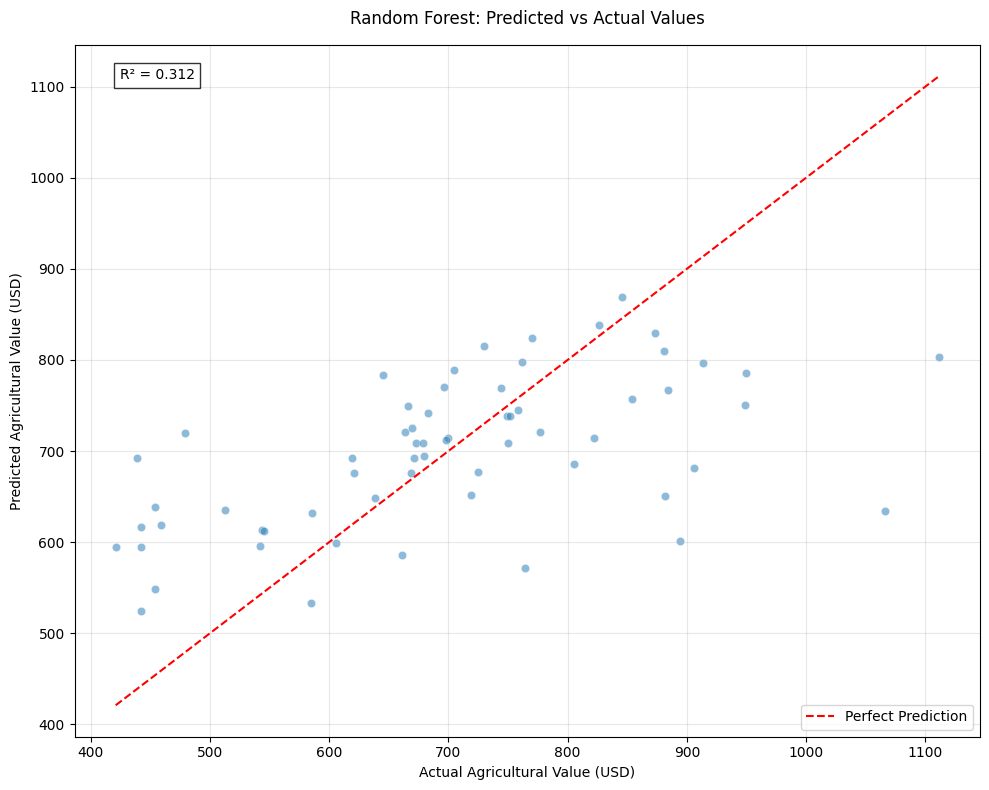


Prediction Statistics:
Mean Actual Value: 700.78
Mean Predicted Value: 698.25
Standard Deviation of Actual Values: 159.34
Standard Deviation of Predictions: 81.11


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_rf, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_rf.min()), max(Y_test.max(), predictions_rf.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Random Forest: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_rf:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_rf.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_rf.std():.2f}")

*RANDOM FOREST: RESIDUALS PLOT*

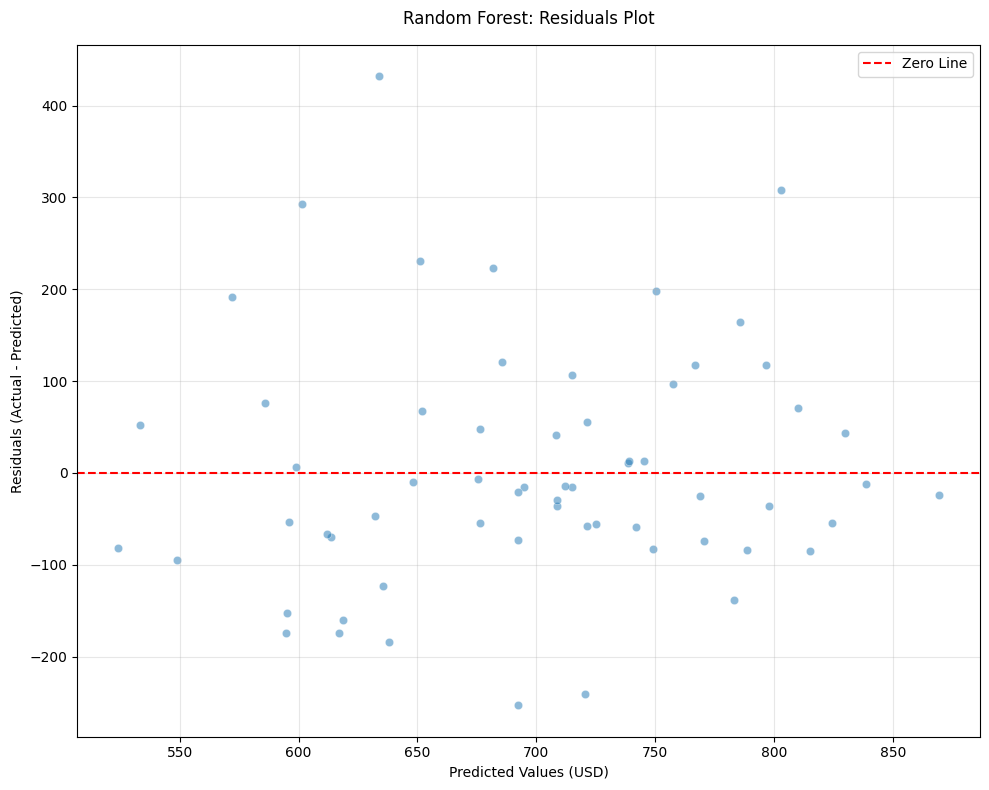


Residuals Statistics:
Mean of Residuals: 2.53
Standard Deviation of Residuals: 130.03
Minimum Residual: -253.05
Maximum Residual: 432.00
Median Residual: -18.00


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals
residuals_rf = Y_test - predictions_rf

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_rf, y=residuals_rf, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Random Forest: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nResiduals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_rf):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_rf):.2f}")
print(f"Minimum Residual: {np.min(residuals_rf):.2f}")
print(f"Maximum Residual: {np.max(residuals_rf):.2f}")
print(f"Median Residual: {np.median(residuals_rf):.2f}")

**KNN REGRESSOR**

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with KNeighborsRegressor
knn_model = ScalableModel(model=KNeighborsRegressor(n_neighbors=5, weights='uniform'), 
                         feature_scaler=MinMaxScaler(), 
                         target_scaler=MinMaxScaler())

# Train the model with scaled data
knn_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(Y_test, predictions_knn)
mae_knn = mean_absolute_error(Y_test, predictions_knn)
r2_knn = r2_score(Y_test, predictions_knn)
rmse_knn = np.sqrt(mse_knn)

# Print evaluation metrics
print(f'MSE: {mse_knn:.3f}')
print(f'MAE: {mae_knn:.3f}')
print(f'R^2: {r2_knn:.3f}')
print(f'RMSE: {rmse_knn:.3f}')
print(f'RMSE: {rmse_rf:.3f}')

Scaled Predictions Min/Max: 0.15163324263895356, 0.6924003462984938
Inverse Transformed Predictions Min/Max: 473.8081081081081, 977.6404063605263
MSE: 16437.554
MAE: 98.878
R^2: 0.342
RMSE: 128.209
RMSE: 131.052


*KNN REGRESSOR WITH CROSS-VALIDATION*

In [34]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],   # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': [1, 2]  # Distance metric: 1 for Manhattan, 2 for Euclidean
}

# Initialize KNN model
knn = KNeighborsRegressor()

# Define cross-validation strategy (5-fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=cv,
    scoring='neg_mean_squared_error',  # Minimize MSE
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV using raw X_train and Y_train (before scaling)
grid_search_knn.fit(X_train, Y_train)

# Retrieve best hyperparameters
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)

# Create the `ScalableModel` with the best KNN parameters
knn_model_grid = ScalableModel(
    model=KNeighborsRegressor(**best_params_knn), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler()
)

# Train the ScalableModel with KNN
knn_model_grid.fit(X_train, Y_train)

# Make predictions on the test data
predictions_knn_grid = knn_model_grid.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(Y_test, predictions_knn_grid)
mae_knn = mean_absolute_error(Y_test, predictions_knn_grid)
r2_knn = r2_score(Y_test, predictions_knn_grid)
rmse_knn = np.sqrt(mse_knn)

# Print evaluation metrics
print(f'MSE (KNN): {mse_knn:.3f}')
print(f'MAE (KNN): {mae_knn:.3f}')
print(f'R^2 (KNN): {r2_knn:.3f}')
print(f'RMSE (KNN): {rmse_knn:.3f}')


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Scaled Predictions Min/Max: 0.1825712731842189, 0.5885691240374997
Inverse Transformed Predictions Min/Max: 502.6330475830476, 880.9009357305781
MSE (KNN): 16897.336
MAE (KNN): 98.868
R^2 (KNN): 0.324
RMSE (KNN): 129.990


*KNN REGRESSOR PREDICTIONS*

In [35]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the KNN model
predicted_value_knn = knn_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_knn],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (KNN Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_knn - actual_value):.2f}")

Scaled Predictions Min/Max: 0.5131429656664876, 0.5131429656664876
Inverse Transformed Predictions Min/Max: 810.6264414737242, 810.6264414737242

Comparison of Predicted vs. Actual Agricultural Value (KNN Model):
                                      Actual Features  \
60  [0.360902256, 0.360902256, 0.060150376, 0.1203...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
60                        810.626441                     769.900491  

Absolute Difference: 40.73


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*KNN REGRESSOR: PREDICTED vs ACTUAL*

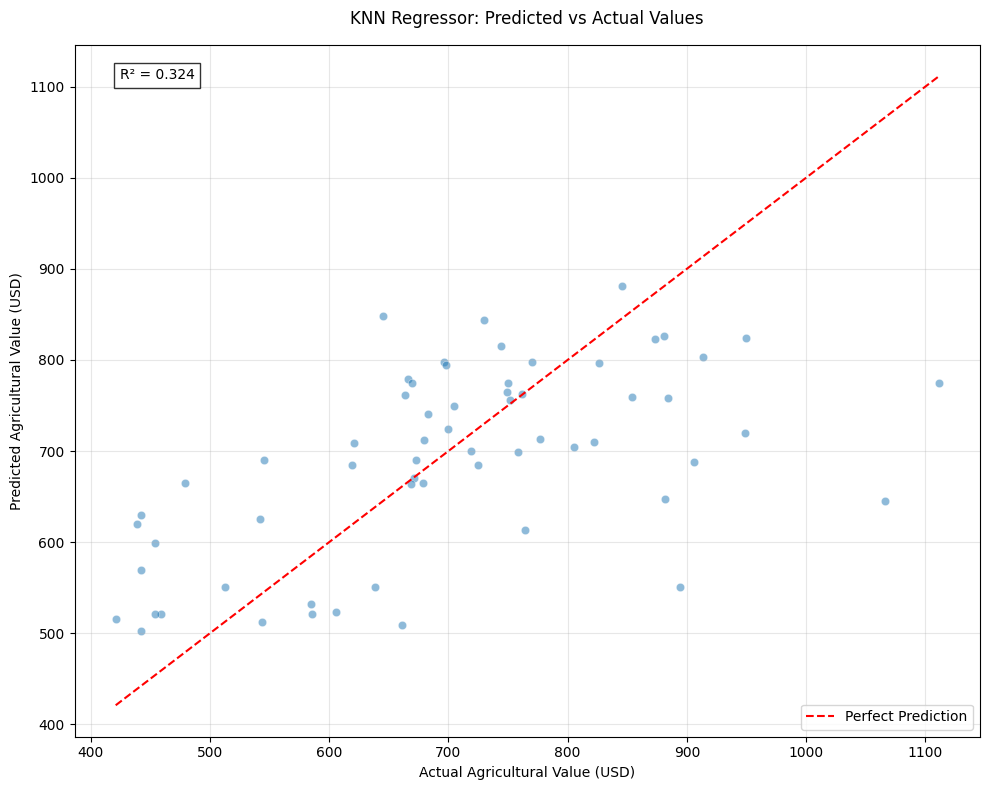


Prediction Statistics:
Mean Actual Value: 700.78
Mean Predicted Value: 689.71
Standard Deviation of Actual Values: 159.34
Standard Deviation of Predictions: 102.98


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_knn_grid, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_knn_grid.min()), max(Y_test.max(), predictions_knn_grid.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('KNN Regressor: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_knn:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_knn_grid.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_knn_grid.std():.2f}")

*KNN RESIDUALS PLOT*

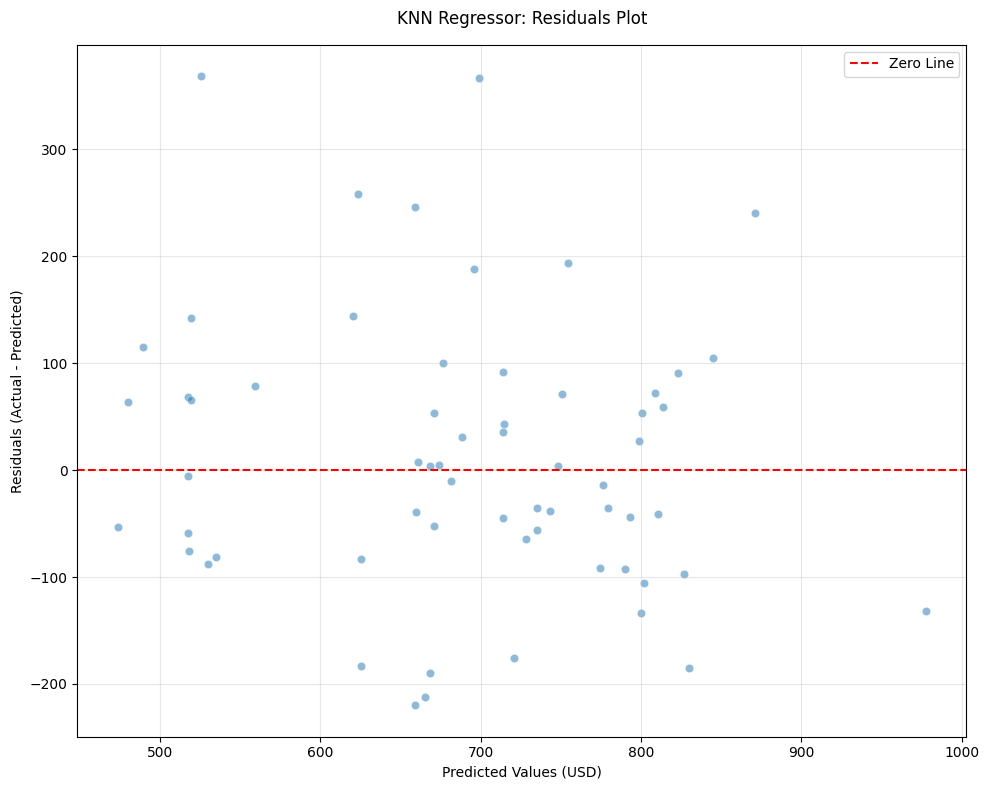


KNN Residuals Statistics:
Mean of Residuals: 10.59
Standard Deviation of Residuals: 127.77
Minimum Residual: -219.94
Maximum Residual: 368.46
Median Residual: -0.80


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for KNN
residuals_knn = Y_test - predictions_knn

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_knn, y=residuals_knn, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('KNN Regressor: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nKNN Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_knn):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_knn):.2f}")
print(f"Minimum Residual: {np.min(residuals_knn):.2f}")
print(f"Maximum Residual: {np.max(residuals_knn):.2f}")
print(f"Median Residual: {np.median(residuals_knn):.2f}")

**XGBOOST MODEL**

In [38]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with XGBRegressor
xgb_model = ScalableModel(model=XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
xgb_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(Y_test, predictions_xgb)
mae_xgb = mean_absolute_error(Y_test, predictions_xgb)
r2_xgb = r2_score(Y_test, predictions_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Print evaluation metrics
print("XGBoost Model Metrics:")
print(f'MSE: {mse_xgb:.3f}')
print(f'MAE: {mae_xgb:.3f}')
print(f'R^2: {r2_xgb:.3f}')
print(f'RMSE: {rmse_xgb:.3f}')



Scaled Predictions Min/Max: 0.17078526318073273, 0.6434256434440613
Inverse Transformed Predictions Min/Max: 491.65203857421875, 932.0106811523438
XGBoost Model Metrics:
MSE: 15768.916
MAE: 94.769
R^2: 0.369
RMSE: 125.574


*FEATURE IMPORTANCE*

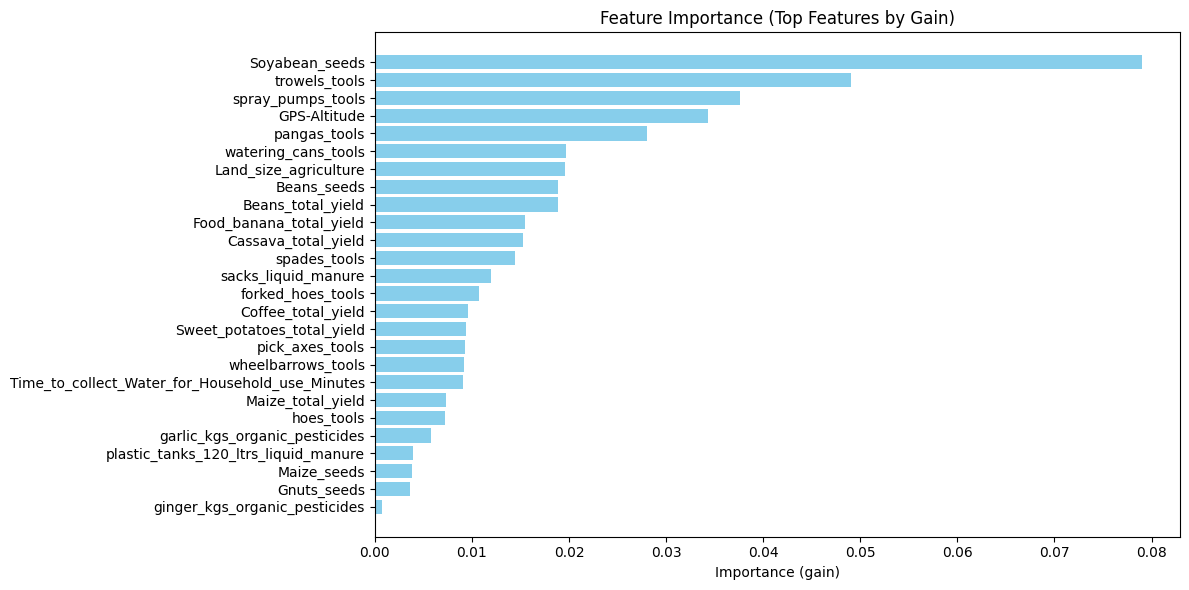

In [39]:
import matplotlib.pyplot as plt

# Access the internal XGBRegressor from ScalableModel
inner_model = xgb_model.model

# Get raw importances from booster
importance = inner_model.get_booster().get_score(importance_type='gain')

# Map 'f0', 'f1', ... to actual column names
feature_map = {f"f{i}": col for i, col in enumerate(X_train.columns)}
importance_named = {feature_map.get(k, k): v for k, v in importance.items()}

# Sort by importance
sorted_items = sorted(importance_named.items(), key=lambda item: item[1], reverse=True)
features, scores = zip(*sorted_items)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Importance (gain)')
plt.title('Feature Importance (Top Features by Gain)')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()




A higher gain means the feature is more influential in reducing error, and hence more important.

*FEATURE CONTRIBUTIONS*

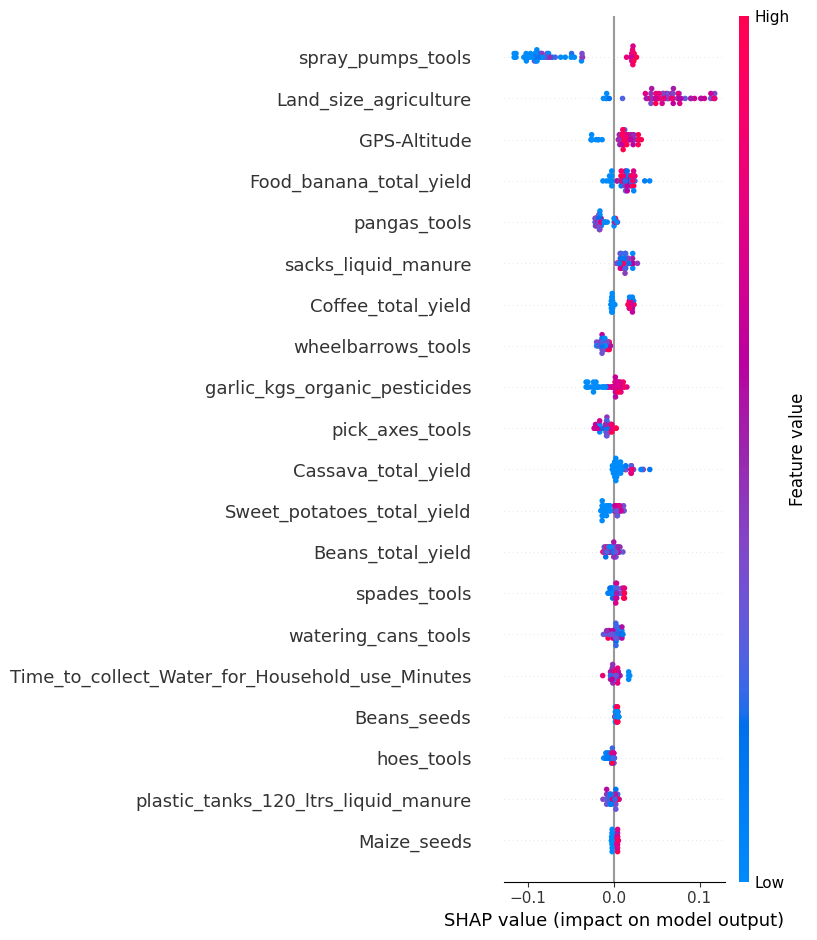

In [48]:
import shap

# Create SHAP explainer from trained XGBoost model
explainer = shap.Explainer(xgb_model.model)

# Compute SHAP values for the dataset
shap_values = explainer(X_test)

# Visualize contributions
# Summary plot (global overview)
shap.summary_plot(shap_values, X_test)

# Force plot (individual prediction explanation)
shap.plots.force(shap_values[0])  # for first row in test set


*Shap Values*

In [52]:

# Convert SHAP values to DataFrame
shap_values_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

# Recover original feature values from scaled X_test
X_test_original = pd.DataFrame(
    xgb_model.feature_scaler.inverse_transform(X_test),
    columns=X_test.columns
)


# Combine original feature values and SHAP values
shap_table = pd.concat([
    X_test_original.reset_index(drop=True),
    shap_values_df
], axis=1, keys=["Feature Value", "SHAP Value"])

shap_table.head()


Feature Value                                \
  garlic_kgs_organic_pesticides ginger_kgs_organic_pesticides   
0                      0.204506                      0.204506   
1                      0.000000                      0.000000   
2                      0.034665                      0.034665   
3                      0.259282                      0.259282   
4                      0.000000                      0.000000   

                                                                       \
  plastic_tanks_120_ltrs_liquid_manure sacks_liquid_manure hoes_tools   
0                             0.005919            0.018730   0.025355   
1                             0.004792            0.015162   0.074290   
2                             0.007274            0.011509   0.186955   
3                             0.007021            0.022215   0.054130   
4                             0.002795            0.008845   0.074290   

                                                               \
  spades_tools pick_axes_tools forked_hoes_tools pangas_tools   
0     0.010142        0.007302          0.004868     0.003381   
1     0.049526        0.035660          0.035660     0.000000   
2     0.083091        0.029913          0.029913     0.020773   
3     0.024058        0.017322          0.017322     0.012029   
4     0.049526        0.035660          0.035660     0.000000   

                      ...           SHAP Value               \
  wheelbarrows_tools  ... Irish Potatoes_seeds GPS-Altitude   
0           0.003440  ...                  0.0     0.010741   
1           0.002785  ...                  0.0     0.011955   
2           0.002114  ...                  0.0    -0.026532   
3           0.002040  ...                  0.0     0.007087   
4           0.001624  ...                  0.0     0.010501   

                                                                         \
  Land_size_agriculture Time_to_collect_Water_for_Household_use_Minutes   
0              0.069313                                        0.005312   
1              0.043674                                       -0.001011   
2             -0.011971                                        0.018669   
3              0.043387                                        0.002968   
4              0.058385                                       -0.000914   

                                                           \
  Beans_total_yield Cassava_total_yield Maize_total_yield   
0         -0.004872            0.002628          0.002573   
1          0.002816            0.033627          0.001119   
2         -0.002012           -0.000084          0.000333   
3         -0.011077            0.020211          0.000520   
4          0.005447            0.002458          0.000661   

                                                                         
  Sweet_potatoes_total_yield Food_banana_total_yield Coffee_total_yield  
0                   0.003920                0.021212          -0.002289  
1                   0.011654                0.003596           0.023273  
2                  -0.013507               -0.004459          -0.001751  
3                  -0.008497                0.019792           0.018402  
4                   0.008590                0.011790           0.021829  

[5 rows x 54 columns]

In [54]:
# Compute average absolute SHAP values for each feature
average_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create a summary DataFrame
shap_importance = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean |SHAP value|": average_shap_values
}).sort_values(by="Mean |SHAP value|", ascending=False)

# View top features
shap_importance


,Feature,Mean |SHAP value|
12,spray_pumps_tools,0.067514
19,Land_size_agriculture,0.061831
18,GPS-Altitude,0.015501
25,Food_banana_total_yield,0.015080
8,pangas_tools,0.014326
3,sacks_liquid_manure,0.013112
26,Coffee_total_yield,0.011848
9,wheelbarrows_tools,0.011606
0,garlic_kgs_organic_pesticides,0.010910
6,pick_axes_tools,0.009537


In [55]:
# Inverse scale the SHAP values for the target (USD)
shap_values_usd = xgb_model.target_scaler.inverse_transform(shap_values.values)

# Compute the average inverse-scaled SHAP values for each feature
average_shap_values_usd = np.abs(shap_values_usd).mean(axis=0)

# Create a summary DataFrame for the features and their average SHAP values (in USD)
shap_importance_usd = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean |SHAP value (USD)|": average_shap_values_usd
}).sort_values(by="Mean |SHAP value (USD)|", ascending=False)

# View the table
shap_importance_usd.head()


,Feature,Mean |SHAP value (USD)|
19,Land_size_agriculture,388.863983
25,Food_banana_total_yield,345.154022
3,sacks_liquid_manure,344.748383
26,Coffee_total_yield,341.983643
18,GPS-Altitude,341.759827


*Save xgboost model*

In [41]:
import joblib
import xgboost as xgb

# Assuming you have already trained your XGBoost model
filename = "XGBoost_Model_v1.pkl"  # Choose a descriptive filename
joblib.dump(xgb_model, filename)

print(f"Model saved to {filename}")

# Save the feature and target scalers
joblib.dump({
    "feature_scaler": xgb_model.feature_scaler,
    "target_scaler": xgb_model.target_scaler
}, "Scalers_XGBoost.pkl")

print("Model and scalers saved successfully!")



Model saved to XGBoost_Model_v1.pkl
Model and scalers saved successfully!


*XGBOOST MODEL WITH CROSS-VALIDATION*

In [42]:
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 6, 9],  # Maximum tree depth
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight
    'subsample': [0.7, 0.8, 1.0],  # Subsample ratio
    'colsample_bytree': [0.7, 0.8, 1.0],  # Feature sampling
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction
    'reg_lambda': [0, 1, 10]  # L2 regularization
}

# Initialize XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Define cross-validation strategy (5-fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=cv,
    scoring='neg_mean_squared_error',  
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV using raw X_train and Y_train (before scaling)
grid_search_xgb.fit(X_train, Y_train)

# Retrieve best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Create the `ScalableModel` with the best XGBoost parameters
xgb_model_grid = ScalableModel(
    model=XGBRegressor(**best_params_xgb, objective='reg:squarederror', random_state=42, n_jobs=-1), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler()
)

# Train the ScalableModel with XGBoost
xgb_model_grid.fit(X_train, Y_train)

# Make predictions on the test data
predictions_xgb_grid = xgb_model_grid.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(Y_test, predictions_xgb_grid)
mae_xgb = mean_absolute_error(Y_test, predictions_xgb_grid)
r2_xgb = r2_score(Y_test, predictions_xgb_grid)
rmse_xgb = np.sqrt(mse_xgb)

# Print evaluation metrics
print("XGBoost Model Metrics:")
print(f'MSE: {mse_xgb:.3f}')
print(f'MAE: {mae_xgb:.3f}')
print(f'R^2: {r2_xgb:.3f}')
print(f'RMSE: {rmse_xgb:.3f}')


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
Best Hyperparameters for XGBoost: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 100, 'reg_lambda': 0, 'subsample': 1.0}
Scaled Predictions Min/Max: 0.24564281105995178, 0.5753499865531921
Inverse Transformed Predictions Min/Max: 561.396728515625, 868.584716796875
XGBoost Model Metrics:
MSE: 18751.187
MAE: 104.155
R^2: 0.249
RMSE: 136.935


*MAKE RANDOM PREDICTIONS USING THE XGBOOST MODEL*

In [43]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the XGBoost model
predicted_value_xgb = xgb_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_xgb],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (XGBoost Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_xgb - actual_value):.2f}")

Scaled Predictions Min/Max: 0.32863694429397583, 0.32863694429397583
Inverse Transformed Predictions Min/Max: 638.7223510742188, 638.7223510742188

Comparison of Predicted vs. Actual Agricultural Value (XGBoost Model):
                                      Actual Features  \
33  [0.0, 0.0, 0.016666667, 0.033333333, 0.1670644...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
33                        638.722351                     453.585586  

Absolute Difference: 185.14


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*XGBOOST: PREDICTED vs ACTUAL PLOT*

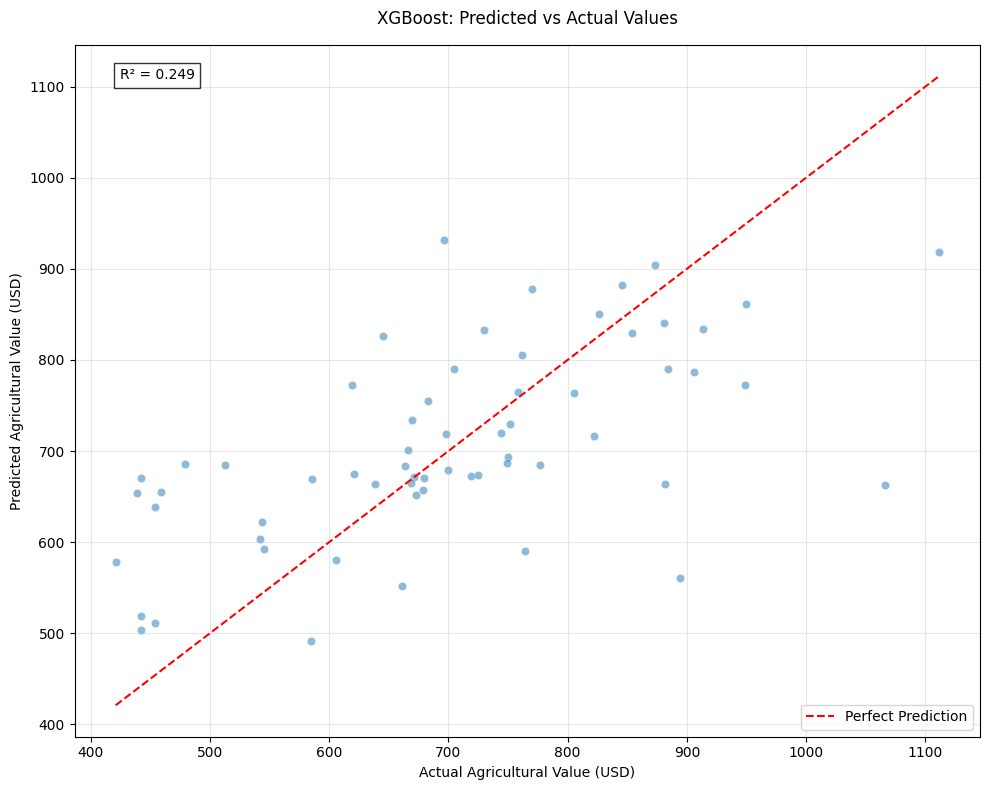


Prediction Statistics:
Mean Actual Value: 700.78
Mean Predicted Value: 706.84
Standard Deviation of Actual Values: 159.34
Standard Deviation of Predictions: 105.24


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_xgb, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_xgb.min()), max(Y_test.max(), predictions_xgb.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('XGBoost: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_xgb:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_xgb.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_xgb.std():.2f}")

*XGBOOST RESIDUALS PLOT*

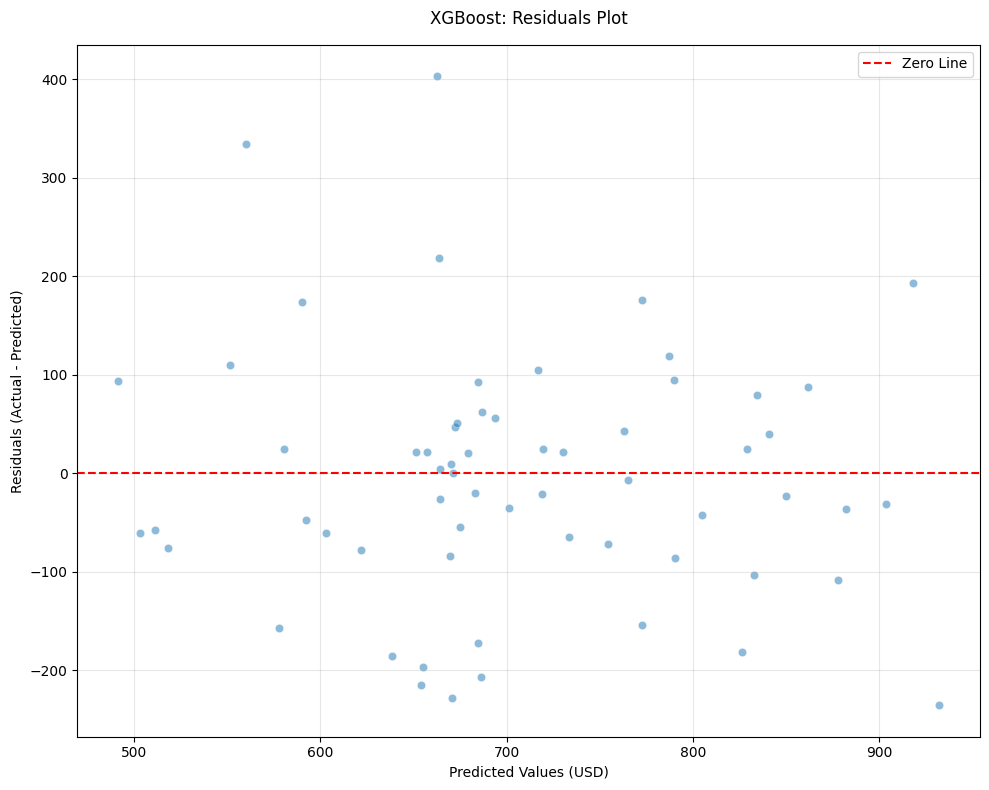


XGBoost Residuals Statistics:
Mean of Residuals: -6.05
Standard Deviation of Residuals: 125.43
Minimum Residual: -235.57
Maximum Residual: 403.07
Median Residual: -13.34


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for XGBoost
residuals_xgb = Y_test - predictions_xgb

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_xgb, y=residuals_xgb, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('XGBoost: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nXGBoost Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_xgb):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_xgb):.2f}")
print(f"Minimum Residual: {np.min(residuals_xgb):.2f}")
print(f"Maximum Residual: {np.max(residuals_xgb):.2f}")
print(f"Median Residual: {np.median(residuals_xgb):.2f}")

**SVM MODEL**

In [46]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with SVR (Support Vector Regression)
svm_model = ScalableModel(model=SVR(
    kernel='rbf',  # Radial Basis Function kernel
    C=1.0,        # Regularization parameter
    epsilon=0.1,   # Epsilon in the epsilon-SVR model
    gamma='scale'  # Kernel coefficient
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
svm_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(Y_test, predictions_svm)
mae_svm = mean_absolute_error(Y_test, predictions_svm)
r2_svm = r2_score(Y_test, predictions_svm)
rmse_svm = np.sqrt(mse_svm)

# Print evaluation metrics
print("SVM Model Metrics:")
print(f'MSE: {mse_svm:.3f}')
print(f'MAE: {mae_svm:.3f}')
print(f'R^2: {r2_svm:.3f}')
print(f'RMSE: {rmse_svm:.3f}')



Scaled Predictions Min/Max: 0.1145419172126873, 0.6176564168238088
Inverse Transformed Predictions Min/Max: 439.2501484832015, 908.0015442463167
SVM Model Metrics:
MSE: 18253.846
MAE: 102.095
R^2: 0.269
RMSE: 135.107


*SVM MODEL-CROSS-VALIDATED MODEL*

In [47]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the hyperparameter grid for SVR
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Different kernel functions
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1],  # Epsilon-tube within which no penalty is given
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize SVR model
svr = SVR()

# Define cross-validation strategy (5-fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_svm = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svm,
    cv=cv,
    scoring='neg_mean_squared_error',  
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV using raw X_train and Y_train (before scaling)
grid_search_svm.fit(X_train, Y_train)

# Retrieve best hyperparameters
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters for SVM:", best_params_svm)

# Create the `ScalableModel` with the best SVR parameters
svm_model_grid = ScalableModel(
    model=SVR(**best_params_svm), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler()
)

# Train the ScalableModel with SVR
svm_model_grid.fit(X_train, Y_train)

# Make predictions on the test data
predictions_svm_grid = svm_model_grid.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(Y_test, predictions_svm_grid)
mae_svm = mean_absolute_error(Y_test, predictions_svm_grid)
r2_svm = r2_score(Y_test, predictions_svm_grid)
rmse_svm = np.sqrt(mse_svm)

# Print evaluation metrics
print("SVM Model Metrics:")
print(f'MSE: {mse_svm:.3f}')
print(f'MAE: {mae_svm:.3f}')
print(f'R^2: {r2_svm:.3f}')
print(f'RMSE: {rmse_svm:.3f}')


Fitting 5 folds for each of 128 candidates, totalling 640 fits


KeyboardInterrupt: 

*MAKE RANDOM PREDICTIONS USING THE SVM*

In [238]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the SVM model
predicted_value_svm = svm_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_svm],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (SVM Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_svm - actual_value):.2f}")

Scaled Predictions Min/Max: 0.28010571748841673, 0.28010571748841673
Inverse Transformed Predictions Min/Max: 593.5058149906874, 593.5058149906874

Comparison of Predicted vs. Actual Agricultural Value (SVM Model):
                                     Actual Features  \
8  [0.5, 0.5, 0.035714286, 0.071428571, 0.1689545...   

   Predicted Value (Original Scale)  Actual Value (Original Scale)  
8                        593.505815                     545.303657  

Absolute Difference: 48.20


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*SVM: PREDICTED vs ACTUAL*

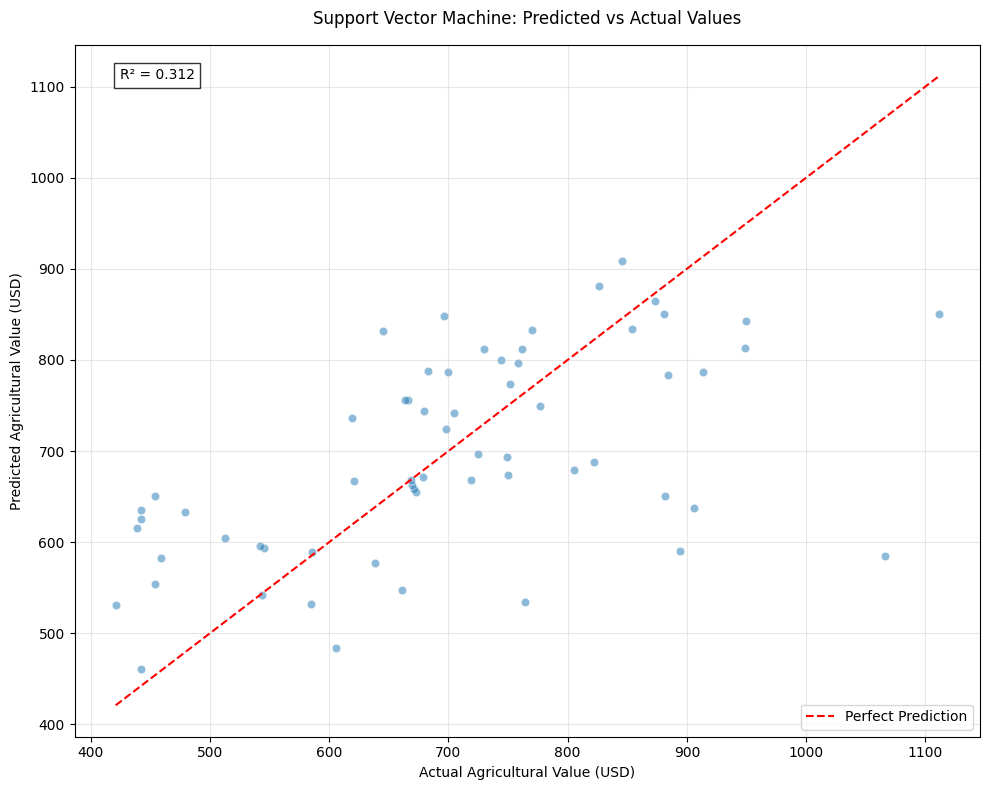


Prediction Statistics:
Mean Actual Value: 700.78
Mean Predicted Value: 695.79
Standard Deviation of Actual Values: 159.34
Standard Deviation of Predictions: 109.65


In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_svm, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_svm.min()), max(Y_test.max(), predictions_svm.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Support Vector Machine: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_svm:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_svm.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_svm.std():.2f}")

*RESIDUALS PLOT*

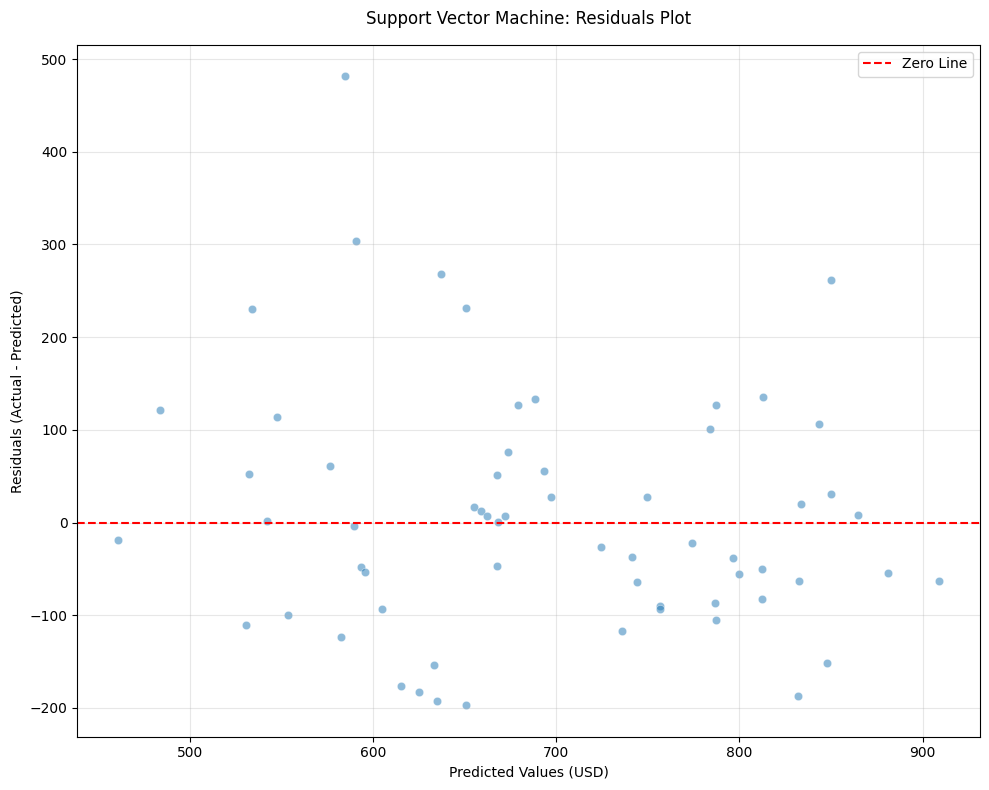


SVM Residuals Statistics:
Mean of Residuals: 4.99
Standard Deviation of Residuals: 131.02
Minimum Residual: -197.10
Maximum Residual: 481.36
Median Residual: -11.41


In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for SVM
residuals_svm = Y_test - predictions_svm

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_svm, y=residuals_svm, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Support Vector Machine: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nSVM Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_svm):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_svm):.2f}")
print(f"Minimum Residual: {np.min(residuals_svm):.2f}")
print(f"Maximum Residual: {np.max(residuals_svm):.2f}")
print(f"Median Residual: {np.median(residuals_svm):.2f}")

**RIDGE REGRESSION**

In [241]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with Ridge Regression
ridge_model = ScalableModel(model=Ridge(
    alpha=1.0,      # Regularization strength
    random_state=42 # For reproducibility
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
ridge_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(Y_test, predictions_ridge)
mae_ridge = mean_absolute_error(Y_test, predictions_ridge)
r2_ridge = r2_score(Y_test, predictions_ridge)
rmse_ridge = np.sqrt(mse_ridge)

# Print evaluation metrics
print("Ridge Regression Model Metrics:")
print(f'MSE: {mse_ridge:.3f}')
print(f'MAE: {mae_ridge:.3f}')
print(f'R^2: {r2_ridge:.3f}')
print(f'RMSE: {rmse_ridge:.3f}')



Scaled Predictions Min/Max: 0.19476260751568775, 0.5753503824859041
Inverse Transformed Predictions Min/Max: 513.9917044862137, 868.5850443036131
Ridge Regression Model Metrics:
MSE: 17531.394
MAE: 99.141
R^2: 0.298
RMSE: 132.406


*RIDGE REGRESSION RANDOM PREDICTIONS*

In [242]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the Ridge model
predicted_value_ridge = ridge_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_ridge],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (Ridge Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_ridge - actual_value):.2f}")

Scaled Predictions Min/Max: 0.3255766523214944, 0.3255766523214944
Inverse Transformed Predictions Min/Max: 635.8710503121376, 635.8710503121376

Comparison of Predicted vs. Actual Agricultural Value (Ridge Model):
                                      Actual Features  \
37  [0.0, 0.0, 0.043478261, 0.043478261, 0.1202856...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
37                         635.87105                     805.664093  

Absolute Difference: 169.79


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*RIDGE REGRESSION: PREDICTED vs ACTUAL*

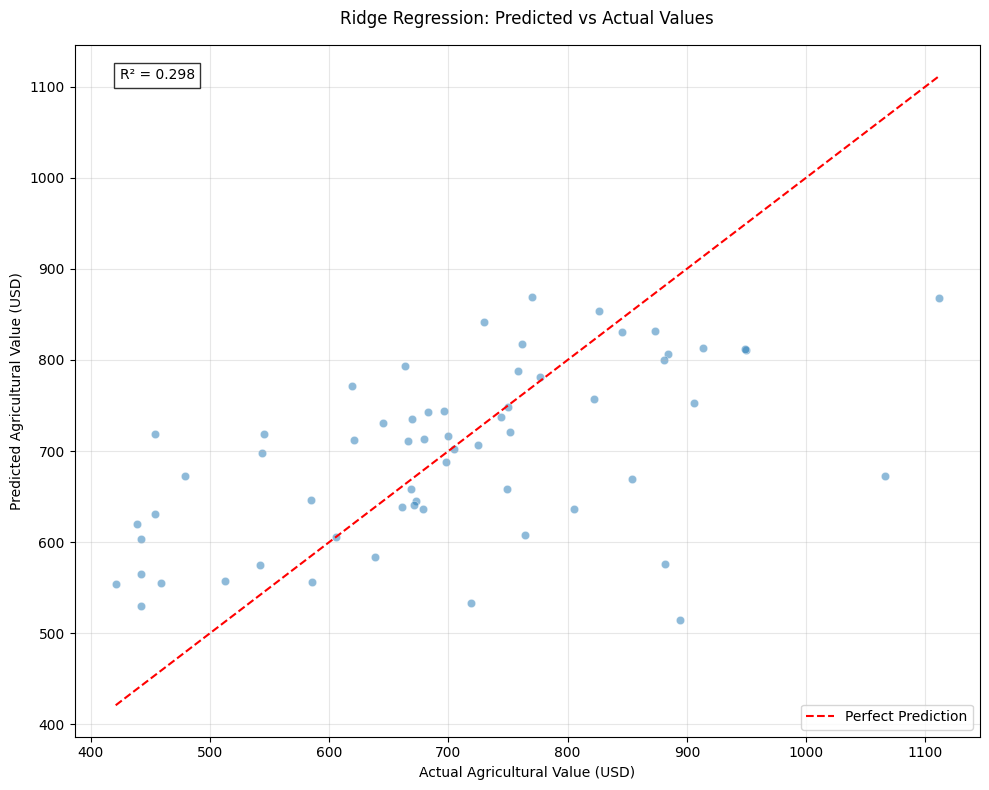


Prediction Statistics:
Mean Actual Value: 700.78
Mean Predicted Value: 696.50
Standard Deviation of Actual Values: 159.34
Standard Deviation of Predictions: 94.63


In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_ridge, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_ridge.min()), max(Y_test.max(), predictions_ridge.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Ridge Regression: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_ridge:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_ridge.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_ridge.std():.2f}")

*RIDGE REGRESSION RESIDUAL PLOT*

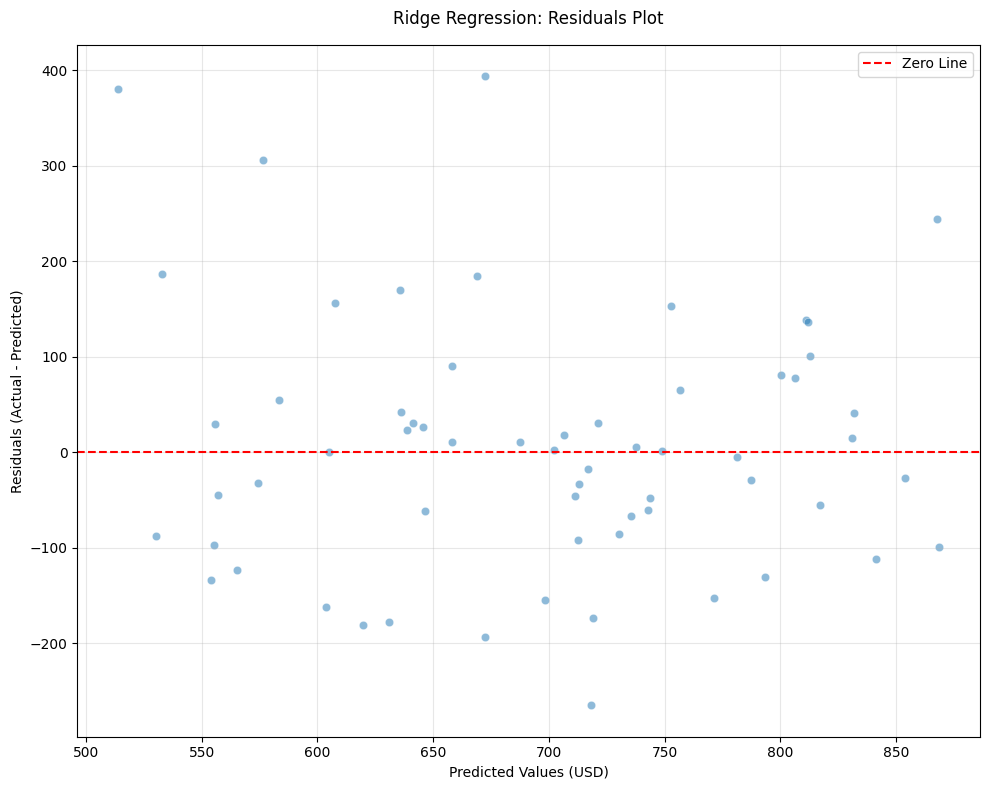


Ridge Regression Residuals Statistics:
Mean of Residuals: 4.28
Standard Deviation of Residuals: 132.34
Minimum Residual: -264.68
Maximum Residual: 393.55
Median Residual: 0.60


In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for Ridge Regression
residuals_ridge = Y_test - predictions_ridge

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_ridge, y=residuals_ridge, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Ridge Regression: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nRidge Regression Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_ridge):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_ridge):.2f}")
print(f"Minimum Residual: {np.min(residuals_ridge):.2f}")
print(f"Maximum Residual: {np.max(residuals_ridge):.2f}")
print(f"Median Residual: {np.median(residuals_ridge):.2f}")

**LASSO REGRESSION**

In [245]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with Lasso Regression
lasso_model = ScalableModel(model=Lasso(
    alpha=1.0,      # Regularization strength
    random_state=42,# For reproducibility
    max_iter=1000   # Maximum number of iterations
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
lasso_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(Y_test, predictions_lasso)
mae_lasso = mean_absolute_error(Y_test, predictions_lasso)
r2_lasso = r2_score(Y_test, predictions_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# Print evaluation metrics
print("Lasso Regression Model Metrics:")
print(f'MSE: {mse_lasso:.3f}')
print(f'MAE: {mae_lasso:.3f}')
print(f'R^2: {r2_lasso:.3f}')
print(f'RMSE: {rmse_lasso:.3f}')



Scaled Predictions Min/Max: 0.3989536280179622, 0.3989536280179622
Inverse Transformed Predictions Min/Max: 704.2363226332121, 704.2363226332121
Lasso Regression Model Metrics:
MSE: 24990.418
MAE: 124.213
R^2: -0.000
RMSE: 158.084


*LASSO REGRESSION RANDOM PREDICTIONS*

In [246]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the Lasso model
predicted_value_lasso = lasso_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_lasso],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (Lasso Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_lasso - actual_value):.2f}")

# Print number of features used (non-zero coefficients)
n_features_used = np.sum(lasso_model.model.coef_ != 0)
print(f"\nNumber of features used by Lasso: {n_features_used}")

Scaled Predictions Min/Max: 0.3989536280179622, 0.3989536280179622
Inverse Transformed Predictions Min/Max: 704.2363226332121, 704.2363226332121

Comparison of Predicted vs. Actual Agricultural Value (Lasso Model):
                                      Actual Features  \
26  [0.0, 0.0, 0.039215686, 0.009803922, 0.3428571...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
26                        704.236323                     458.772727  

Absolute Difference: 245.46

Number of features used by Lasso: 0


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*LASSO REGRESSION: PREDICTED vs ACTUAL*

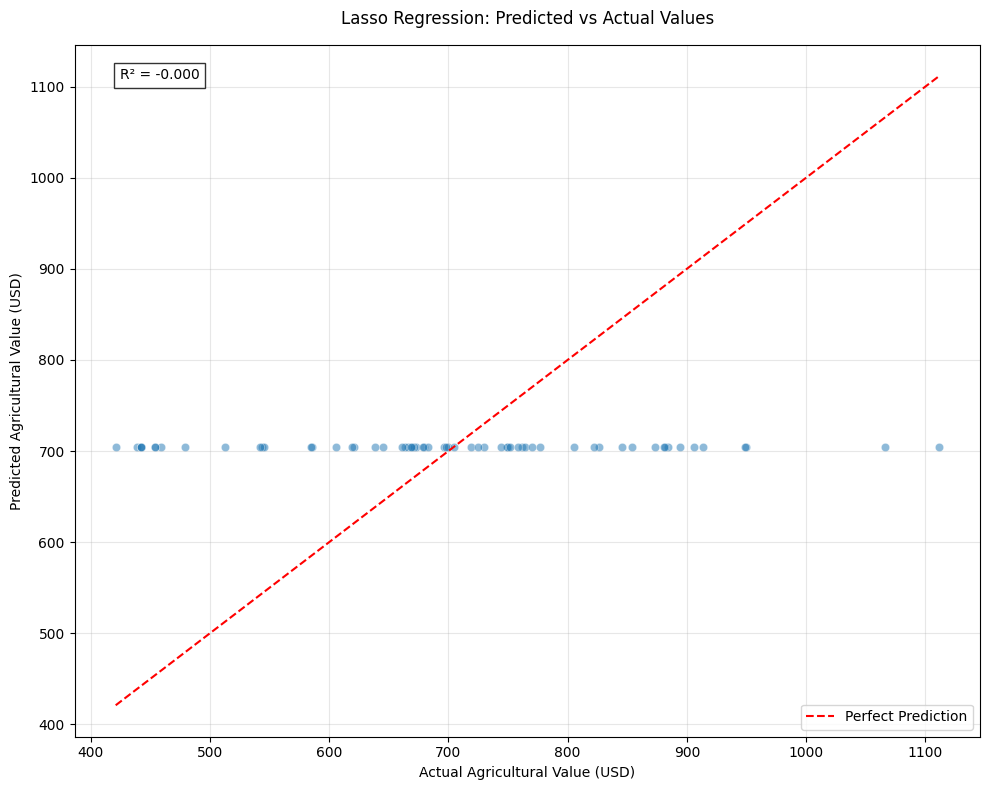


Prediction Statistics:
Mean Actual Value: 700.78
Mean Predicted Value: 704.24
Standard Deviation of Actual Values: 159.34
Standard Deviation of Predictions: 0.00


In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_lasso, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_lasso.min()), max(Y_test.max(), predictions_lasso.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Lasso Regression: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_lasso:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_lasso.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_lasso.std():.2f}")

*LASSO RESIDUAL PLOT*

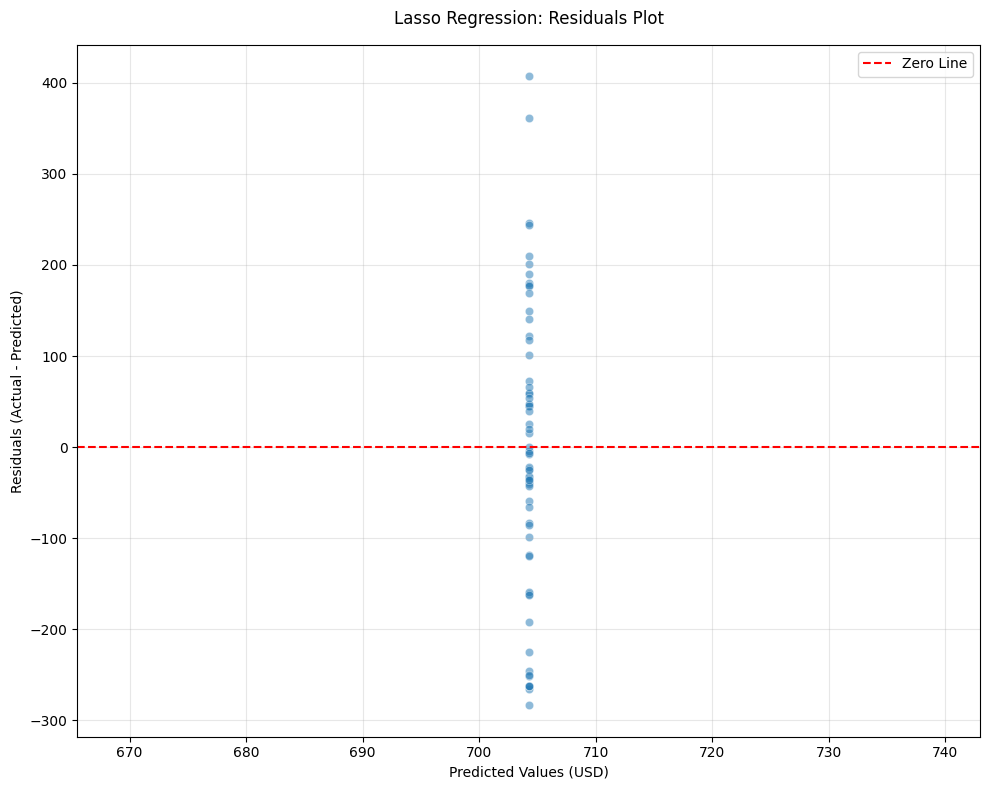


Lasso Regression Residuals Statistics:
Mean of Residuals: -3.45
Standard Deviation of Residuals: 158.05
Minimum Residual: -283.32
Maximum Residual: 407.14
Median Residual: -7.00


In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for Lasso Regression
residuals_lasso = Y_test - predictions_lasso

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_lasso, y=residuals_lasso, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Lasso Regression: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nLasso Regression Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_lasso):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_lasso):.2f}")
print(f"Minimum Residual: {np.min(residuals_lasso):.2f}")
print(f"Maximum Residual: {np.max(residuals_lasso):.2f}")
print(f"Median Residual: {np.median(residuals_lasso):.2f}")

**ELASTIC NET REGRESSION**

In [249]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with ElasticNet Regression
elastic_model = ScalableModel(model=ElasticNet(
    alpha=1.0,      # Regularization strength
    l1_ratio=0.5,   # Balance between L1 and L2 (0.5 = equal weight)
    random_state=42,# For reproducibility
    max_iter=1000   # Maximum number of iterations
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
elastic_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_elastic = elastic_model.predict(X_test)

# Evaluate the model
mse_elastic = mean_squared_error(Y_test, predictions_elastic)
mae_elastic = mean_absolute_error(Y_test, predictions_elastic)
r2_elastic = r2_score(Y_test, predictions_elastic)
rmse_elastic = np.sqrt(mse_elastic)

# Print evaluation metrics
print("Elastic Net Regression Model Metrics:")
print(f'MSE: {mse_elastic:.3f}')
print(f'MAE: {mae_elastic:.3f}')
print(f'R^2: {r2_elastic:.3f}')
print(f'RMSE: {rmse_elastic:.3f}')



Scaled Predictions Min/Max: 0.3989536280179622, 0.3989536280179622
Inverse Transformed Predictions Min/Max: 704.2363226332121, 704.2363226332121
Elastic Net Regression Model Metrics:
MSE: 24990.418
MAE: 124.213
R^2: -0.000
RMSE: 158.084


*ELASTIC NET RANDOM PREDICTIONS*

In [250]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the Elastic Net model
predicted_value_elastic = elastic_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_elastic],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (Elastic Net Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_elastic - actual_value):.2f}")

# Print number of features used (non-zero coefficients)
n_features_used = np.sum(elastic_model.model.coef_ != 0)
print(f"\nNumber of features used by Elastic Net: {n_features_used}")

Scaled Predictions Min/Max: 0.3989536280179622, 0.3989536280179622
Inverse Transformed Predictions Min/Max: 704.2363226332121, 704.2363226332121

Comparison of Predicted vs. Actual Agricultural Value (Elastic Net Model):
                                      Actual Features  \
35  [0.285714286, 0.285714286, 0.126984127, 0.2539...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
35                        704.236323                     826.477477  

Absolute Difference: 122.24

Number of features used by Elastic Net: 0


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*ELAATIC NET: PREDICTED vs ACTUAL*

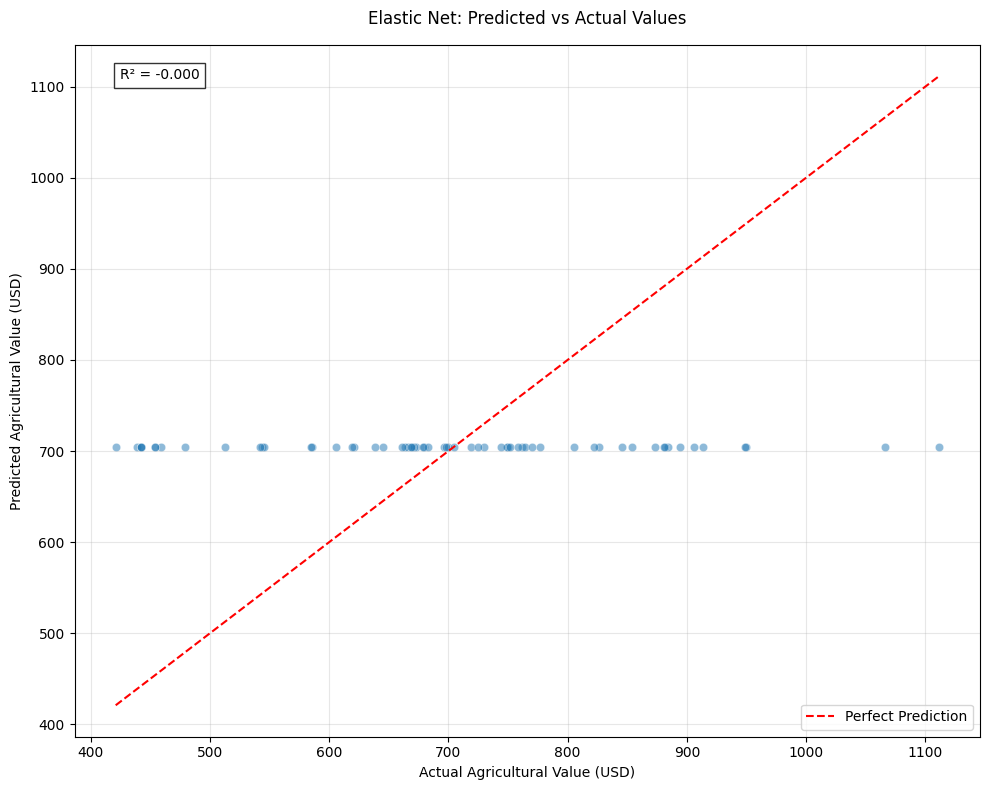


Prediction Statistics:
Mean Actual Value: 700.78
Mean Predicted Value: 704.24
Standard Deviation of Actual Values: 159.34
Standard Deviation of Predictions: 0.00


In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_elastic, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_elastic.min()), max(Y_test.max(), predictions_elastic.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Elastic Net: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_elastic:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_elastic.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_elastic.std():.2f}")

*ELASTIC NET RESIDUALS*

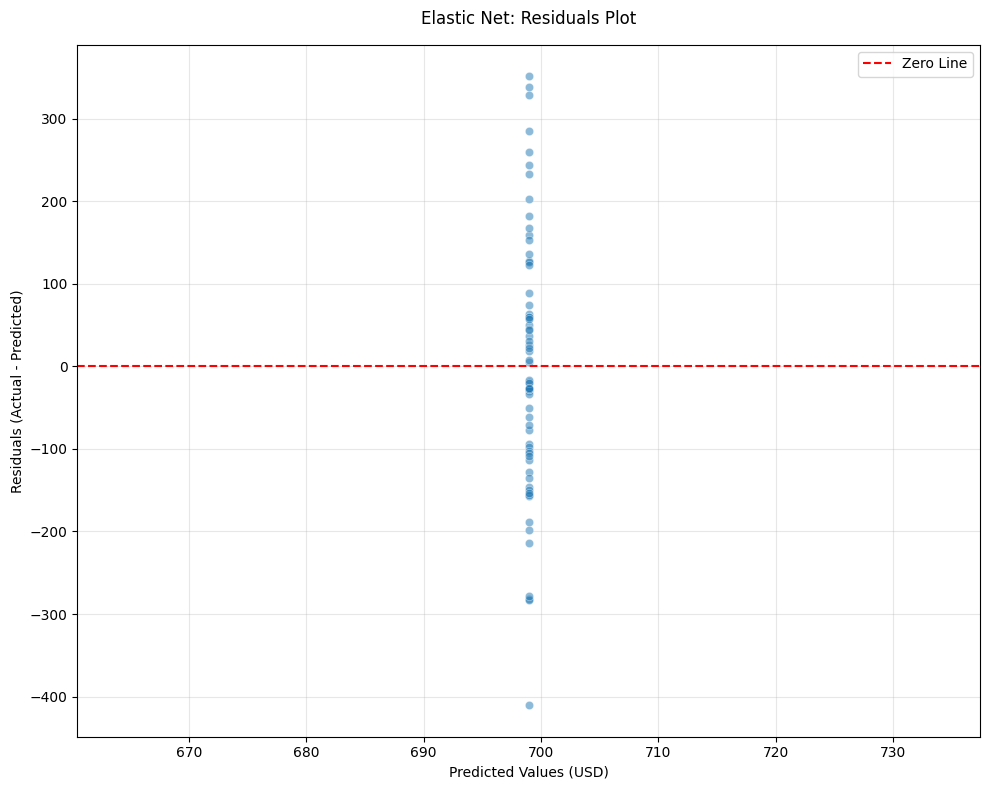


Elastic Net Residuals Statistics:
Mean of Residuals: 1.88
Standard Deviation of Residuals: 158.32
Minimum Residual: -410.57
Maximum Residual: 351.45
Median Residual: -16.27


In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for Elastic Net
residuals_elastic = Y_test - predictions_elastic

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_elastic, y=residuals_elastic, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Elastic Net: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nElastic Net Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_elastic):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_elastic):.2f}")
print(f"Minimum Residual: {np.min(residuals_elastic):.2f}")
print(f"Maximum Residual: {np.max(residuals_elastic):.2f}")
print(f"Median Residual: {np.median(residuals_elastic):.2f}")

**DECISION TREE REGRESSOR**

In [183]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with DecisionTreeRegressor
dt_model = ScalableModel(model=DecisionTreeRegressor(
    max_depth=6,           # Maximum depth of the tree
    min_samples_split=2,   # Minimum samples required to split
    min_samples_leaf=1,    # Minimum samples required at leaf node
    random_state=42        # For reproducibility
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
dt_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(Y_test, predictions_dt)
mae_dt = mean_absolute_error(Y_test, predictions_dt)
r2_dt = r2_score(Y_test, predictions_dt)
rmse_dt = np.sqrt(mse_dt)

# Print evaluation metrics
print("Decision Tree Regressor Metrics:")
print(f'MSE: {mse_dt:.3f}')
print(f'MAE: {mae_dt:.3f}')
print(f'R^2: {r2_dt:.3f}')
print(f'RMSE: {rmse_dt:.3f}')



Scaled Predictions Min/Max: 0.0350874935475089, 0.7067947956815186
Inverse Transformed Predictions Min/Max: 365.2225225225225, 991.0517038777908
Decision Tree Regressor Metrics:
MSE: 24323.498
MAE: 119.243
R^2: 0.030
RMSE: 155.960


*DECISION TREE REGRESSOR RANDOM PREDICTIONS*

In [184]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the Decision Tree model
predicted_value_dt = dt_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_dt],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (Decision Tree Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_dt - actual_value):.2f}")

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.model.feature_importances_
}).sort_values('Importance', ascending=False)

# Print top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Scaled Predictions Min/Max: 0.0350874935475089, 0.0350874935475089
Inverse Transformed Predictions Min/Max: 365.2225225225225, 365.2225225225225

Comparison of Predicted vs. Actual Agricultural Value (Decision Tree Model):
                                      Actual Features  \
11  [0.0, 0.0, 0.016949153, 0.033898305, 0.1670644...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
11                        365.222523                      553.29955  

Absolute Difference: 188.08

Top 10 Most Important Features:
                          Feature  Importance
19                   GPS-Altitude    0.185223
12              spray_pumps_tools    0.144318
7               forked_hoes_tools    0.128238
9              wheelbarrows_tools    0.110227
22              Beans_total_yield    0.093272
20          Land_size_agriculture    0.074722
11            watering_cans_tools    0.049993
26        Food_banana_total_yield    0.049363
0   garlic_kgs_organic_pesticides    0.027380


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*DECISION TREE REGRESSOR: predicted VS actual*

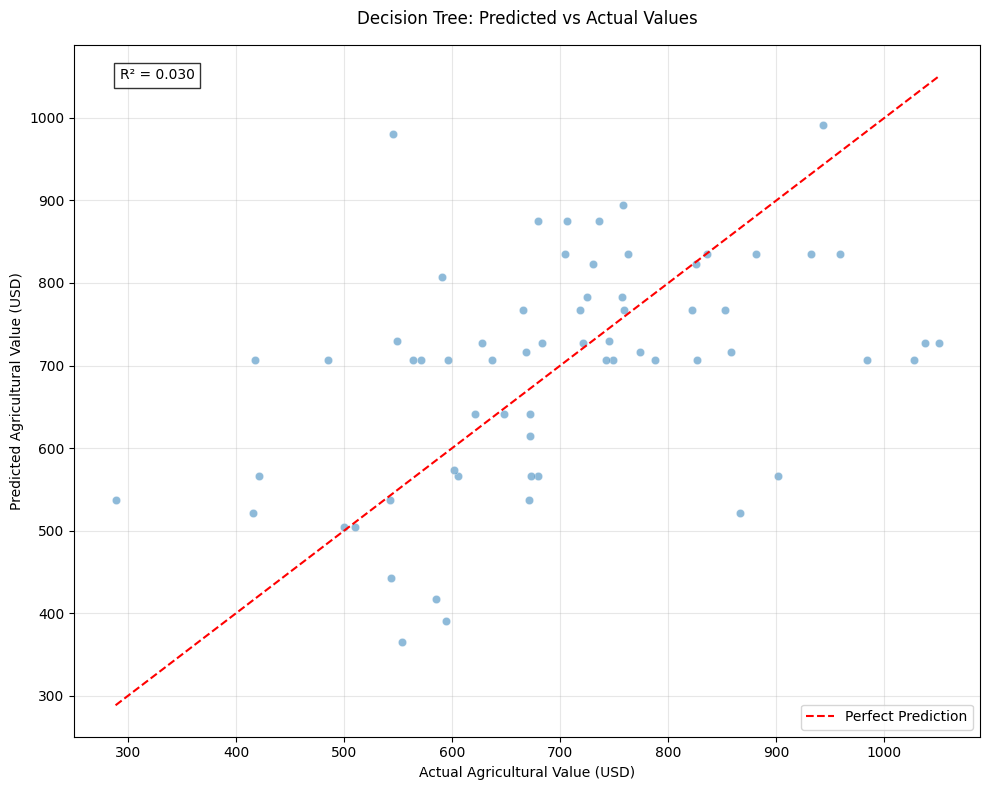


Prediction Statistics:
Mean Actual Value: 700.83
Mean Predicted Value: 696.91
Standard Deviation of Actual Values: 159.55
Standard Deviation of Predictions: 134.96


In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_dt, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_dt.min()), max(Y_test.max(), predictions_dt.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Decision Tree: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_dt:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_dt.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_dt.std():.2f}")

*DECSION TREE REGRESSOR RESIDUALS*

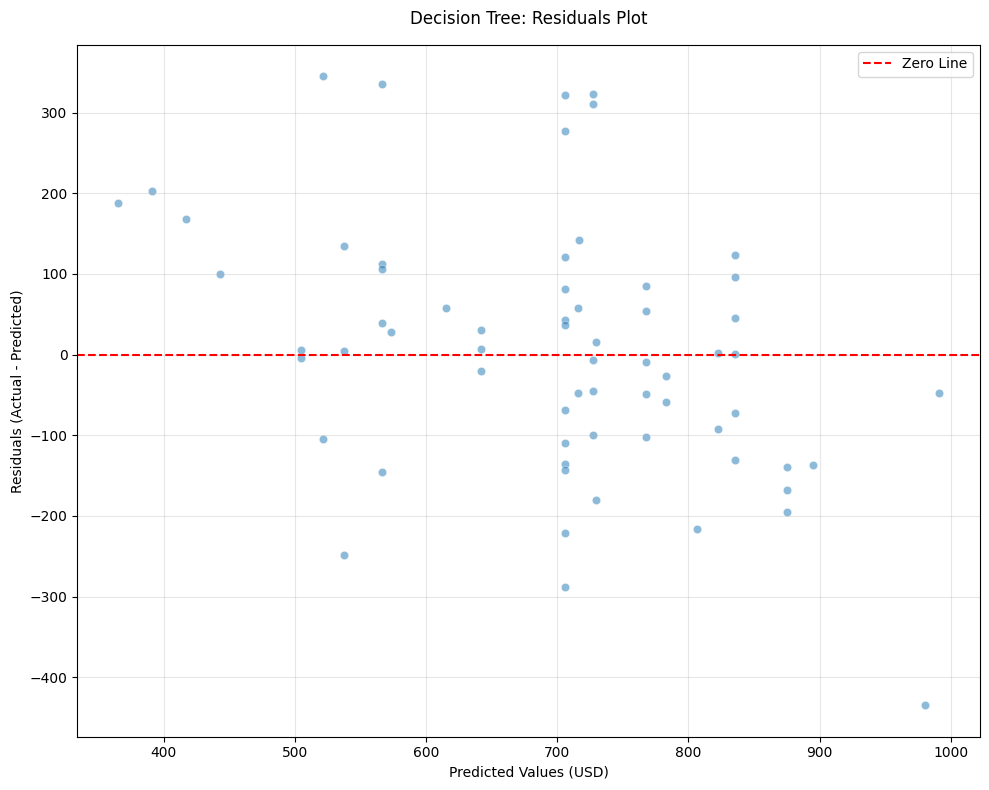


Decision Tree Residuals Statistics:
Mean of Residuals: 3.92
Standard Deviation of Residuals: 155.91
Minimum Residual: -434.86
Maximum Residual: 345.11
Median Residual: 2.43


In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for Decision Tree
residuals_dt = Y_test - predictions_dt

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_dt, y=residuals_dt, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Decision Tree: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nDecision Tree Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_dt):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_dt):.2f}")
print(f"Minimum Residual: {np.min(residuals_dt):.2f}")
print(f"Maximum Residual: {np.max(residuals_dt):.2f}")
print(f"Median Residual: {np.median(residuals_dt):.2f}")

**NEURAL NETWORK REGRESSOR**

In [187]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with Neural Network
nn_model = ScalableModel(model=MLPRegressor(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',             # ReLU activation function
    solver='adam',                # Adam optimizer
    max_iter=1000,               # Maximum iterations
    random_state=42,             # For reproducibility
    learning_rate_init=0.001     # Initial learning rate
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
nn_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_nn = nn_model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(Y_test, predictions_nn)
mae_nn = mean_absolute_error(Y_test, predictions_nn)
r2_nn = r2_score(Y_test, predictions_nn)
rmse_nn = np.sqrt(mse_nn)

# Print evaluation metrics
print("Neural Network Model Metrics:")
print(f'MSE: {mse_nn:.3f}')
print(f'MAE: {mae_nn:.3f}')
print(f'R^2: {r2_nn:.3f}')
print(f'RMSE: {rmse_nn:.3f}')



Scaled Predictions Min/Max: 0.10101349207600016, 0.7019339734064801
Inverse Transformed Predictions Min/Max: 426.6457250960789, 986.5228794695461
Neural Network Model Metrics:
MSE: 22009.236
MAE: 114.771
R^2: 0.122
RMSE: 148.355


*NEURAL NETWORK RANDOM PREDICTIONS*

In [188]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the Neural Network model
predicted_value_nn = nn_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_nn],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (Neural Network Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_nn - actual_value):.2f}")

# Print convergence information
print("\nModel Convergence Information:")
print(f"Number of iterations: {nn_model.model.n_iter_}")
print(f"Loss: {nn_model.model.loss_:.6f}")

Scaled Predictions Min/Max: 0.31765217766928544, 0.31765217766928544
Inverse Transformed Predictions Min/Max: 628.4878233195077, 628.4878233195077

Comparison of Predicted vs. Actual Agricultural Value (Neural Network Model):
                                      Actual Features  \
40  [0.367816092, 0.367816092, 0.091954023, 0.1839...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
40                        628.487823                      594.32973  

Absolute Difference: 34.16

Model Convergence Information:
Number of iterations: 100
Loss: 0.004913


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*NEURAL NETWORK REGRESSOR: PREDICTED vs ACTUAL*

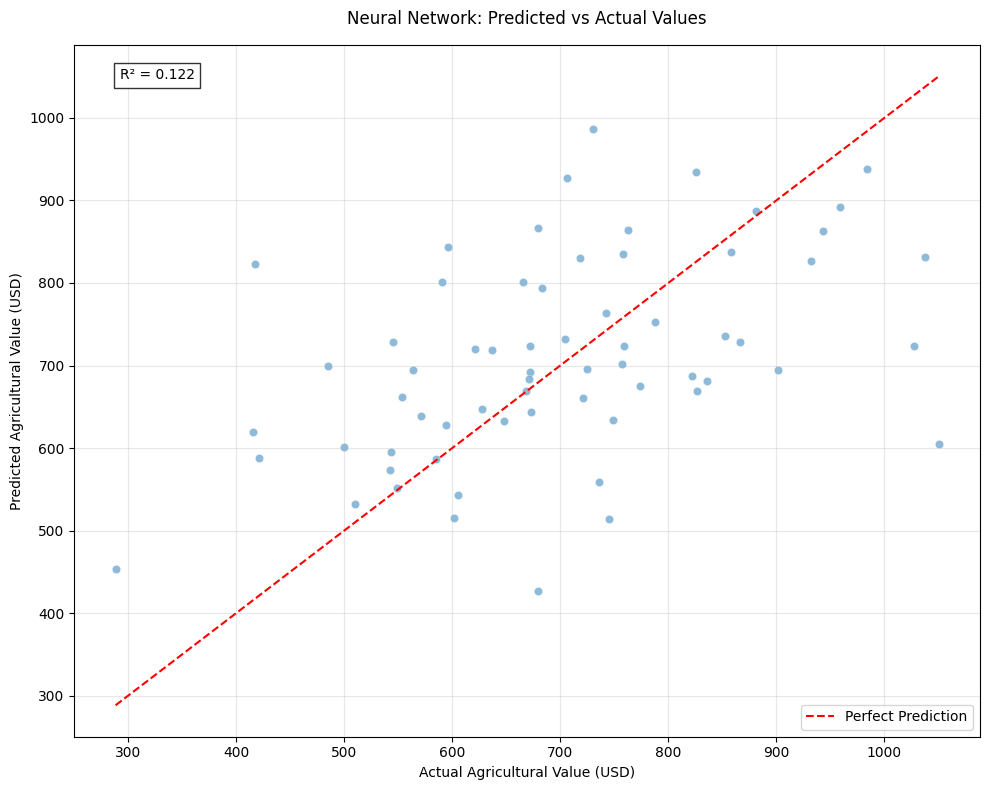


Prediction Statistics:
Mean Actual Value: 700.83
Mean Predicted Value: 709.05
Standard Deviation of Actual Values: 159.55
Standard Deviation of Predictions: 121.93


In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_nn, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_nn.min()), max(Y_test.max(), predictions_nn.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Neural Network: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_nn:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_nn.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_nn.std():.2f}")

*NEURAL NETWORK REGRESSOR: RESIDUAL PLOT*

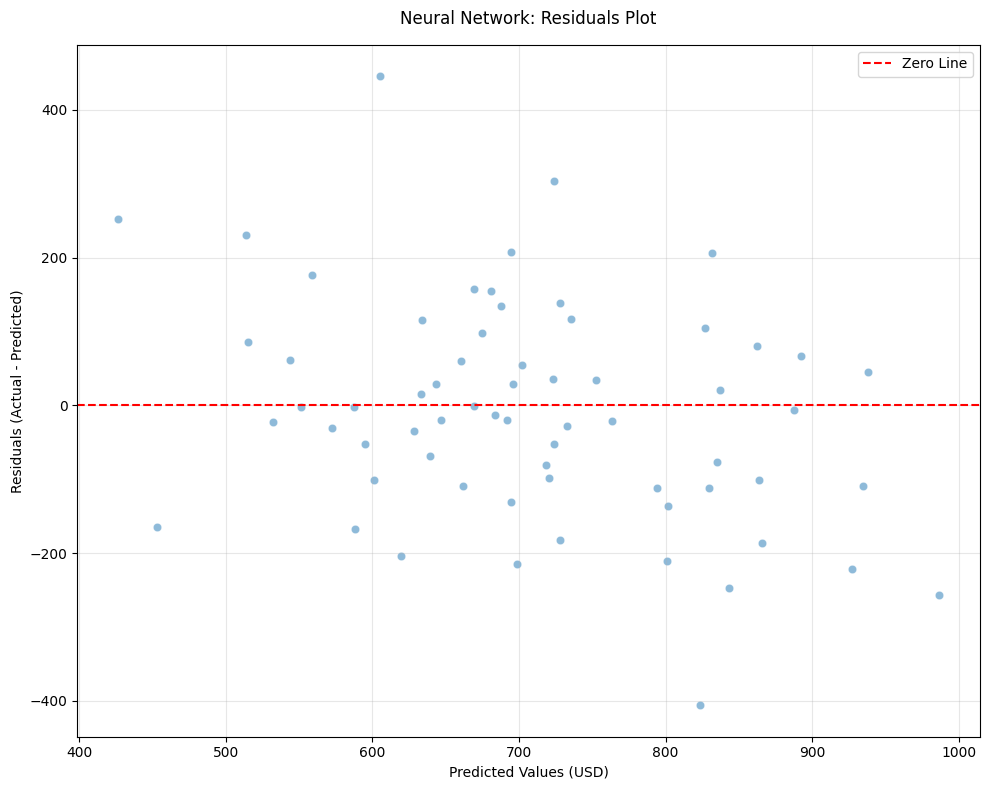


Neural Network Residuals Statistics:
Mean of Residuals: -8.22
Standard Deviation of Residuals: 148.13
Minimum Residual: -405.79
Maximum Residual: 445.39
Median Residual: -12.49


In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for Neural Network
residuals_nn = Y_test - predictions_nn

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_nn, y=residuals_nn, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Neural Network: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nNeural Network Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_nn):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_nn):.2f}")
print(f"Minimum Residual: {np.min(residuals_nn):.2f}")
print(f"Maximum Residual: {np.max(residuals_nn):.2f}")
print(f"Median Residual: {np.median(residuals_nn):.2f}")

**RANDOM FOREST MODEL WITH LOG TRANSFORMATION**

In [348]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Define dependent (Y) and independent (X) variables
X = IDS_8.drop(columns=['Agriculture Value (USD)'])  # Independent variables
Y = IDS_8['Agriculture Value (USD)']  # Dependent variable

# Apply Log Transformation to Independent Variables (Avoid issues with zeros)
X_log = np.log1p(X)  # log1p ensures no issues with zero values

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_log, Y, test_size=0.2, random_state=42)

# Feature Scaling (Optional)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, Y_train)

# Make Predictions
Y_pred = rf_model.predict(X_test_scaled)

# Evaluate the Model
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mse)

# Print Evaluation Metrics
print(f'MSE: {mse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'R^2: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')


MSE: 17057.286
MAE: 99.464
R^2: 0.317
RMSE: 130.604
